<h1 align = center> <i><u><b>Project - Identify the stress levels in individuals</b></u></i>

<h3 align = right><b><i>Implemented By Tejaswini Oruganti </i></b></h1>
<h3 align = right><b><i>LinkedIn ID: https://www.linkedin.com/in/oruganti-tejaswini/
</i></b></h1>

<h3> This dataset focuses on anxiety and depression levels influenced by modern lifestyle changes.</h3>


<h3>Factors such as reduced sleep, limited physical activity, lack of meditation, and financial stress are considered key contributors.
</h3>

<h3>As habits and living styles shift rapidly, mental health challenges have become increasingly common.</h3>

<h3>The dataset emphasizes the importance of balancing health and work life, and analyzes stress levels and their impact on individuals.</h3>
    
<h3>It encourages proactive attention to physical and emotional well-being to prevent anxiety and depression.

<h2> <i><u>Features for this dataset contains</u></i> ---></h2> 

<p> <b> 'Age', 'Gender', 'Education_Level', 'Employment_Status', 'Sleep_Hours',
       'Physical_Activity_Hrs', 'Social_Support_Score', 'Anxiety_Score',
       'Depression_Score', 'Family_History_Mental_Illness',
       'Chronic_Illnesses', 'Medication_Use', 'Therapy', 'Meditation',
       'Substance_Use', 'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score',
       'Life_Satisfaction_Score', 'Loneliness_Score', 'Anxiety_Level'
</b></p>

<h2> <u><i>Target Variable</i></u> ---> </h2><p>'Stress_Level'</p>
       

<h1> <u><i>Packages needed for this project to run</u>

In [5060]:
# Loading all the packages that required to run this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

<h1> <i><u>Machine learning Models used for the data set.</u></i>

In [5062]:
# Machine learning models used for anxiety depression dataset.

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(max_depth=2, random_state=0),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB(alpha = 0.15),
    'Decision Tree (Log-Odds Guided)': LogOddsDecisionTree(max_depth=3)
}


<h1><u><i> Loaded Anxiety depression dataset</i></u>

In [5064]:
# Load anxiety depression data from CSV file into a pandas DataFrame

anxiety_data = pd.read_csv("./downloads/anxiety_depression_data.csv");
anxiety_data.shape

(1200, 21)

<h1><i><u>Anxiety Depression Data set Insights and Information.</u></i> 

In [5066]:
# first 5 rows of data in the dataset.

anxiety_data.head()

Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0   56    Male      Bachelor's        Unemployed          6.0   
1   69  Female      Bachelor's           Retired          8.8   
2   46  Female        Master's          Employed          5.3   
3   32  Female     High School        Unemployed          8.8   
4   60  Female      Bachelor's           Retired          7.2   

   Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                    0.4                     3              4   
1                    2.8                     6             18   
2                    1.6                     5              5   
3                    0.5                     4              6   
4                    0.7                     2              7   

   Depression_Score  Stress_Level  ...  Chronic_Illnesses  Medication_Use  \
0                 2             9  ...                  0             NaN   
1                 7             6  ...                  0             NaN   
2                13             8  ...                  0             NaN   
3                 3             4  ...                  1             NaN   
4                15             3  ...                  0             NaN   

  Therapy  Meditation  Substance_Use Financial_Stress  Work_Stress  \
0       0           1            NaN                4            3   
1       1           0            NaN                1            4   
2       0           1            NaN                8            7   
3       0           0            NaN                7            4   
4       1           1       Frequent                8            9   

   Self_Esteem_Score  Life_Satisfaction_Score  Loneliness_Score  
0                  7                        5                 1  
1                  7                        4                 6  
2                  8                        1                 1  
3                  8                        4                 4  
4                  5                        7                 7  

[5 rows x 21 columns]

In [5067]:
# Display the count of unique values for each column and helps identify categorical columns and potential cardinality issues

print(data.nunique())

Age                              57
Gender                            4
Education_Level                   5
Employment_Status                 4
Sleep_Hours                      85
Physical_Activity_Hrs            99
Social_Support_Score              9
Anxiety_Score                    20
Depression_Score                 20
Stress_Level                      9
Family_History_Mental_Illness     2
Chronic_Illnesses                 2
Medication_Use                    2
Therapy                           2
Meditation                        2
Substance_Use                     2
Financial_Stress                  9
Work_Stress                       9
Self_Esteem_Score                 9
Life_Satisfaction_Score           9
Loneliness_Score                  9
dtype: int64


In [5068]:
# columns and its data types in the dataset.

anxiety_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Medication_Use                 453 non-null    o

In [5069]:
# describe the dataset if its non numeric will get unique values if its numeric get proportion of data.

anxiety_data.describe(include = {"object", "int64", "float64"})

Age  Gender Education_Level Employment_Status  Sleep_Hours  \
count   1200.000000    1200            1200              1200   1200.00000   
unique          NaN       4               5                 4          NaN   
top             NaN  Female             PhD          Employed          NaN   
freq            NaN     569             262               320          NaN   
mean      46.317500     NaN             NaN               NaN      6.46900   
std       16.451157     NaN             NaN               NaN      1.52955   
min       18.000000     NaN             NaN               NaN      2.00000   
25%       33.000000     NaN             NaN               NaN      5.40000   
50%       46.000000     NaN             NaN               NaN      6.40000   
75%       61.000000     NaN             NaN               NaN      7.50000   
max       74.000000     NaN             NaN               NaN     12.40000   

        Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
count             1200.000000           1200.000000    1200.000000   
unique                    NaN                   NaN            NaN   
top                       NaN                   NaN            NaN   
freq                      NaN                   NaN            NaN   
mean                 2.005750              5.055000      10.470000   
std                  2.037818              2.652893       5.911138   
min                  0.000000              1.000000       1.000000   
25%                  0.600000              3.000000       5.000000   
50%                  1.400000              5.000000      10.500000   
75%                  2.700000              7.000000      16.000000   
max                 15.100000              9.000000      20.000000   

        Depression_Score  Stress_Level  ...  Chronic_Illnesses  \
count        1200.000000   1200.000000  ...         1200.00000   
unique               NaN           NaN  ...                NaN   
top                  NaN           NaN  ...                NaN   
freq                 NaN           NaN  ...                NaN   
mean           10.674167      5.000833  ...            0.26750   
std             5.632889      2.538281  ...            0.44284   
min             1.000000      1.000000  ...            0.00000   
25%             6.000000      3.000000  ...            0.00000   
50%            11.000000      5.000000  ...            0.00000   
75%            15.000000      7.000000  ...            1.00000   
max            20.000000      9.000000  ...            1.00000   

        Medication_Use      Therapy   Meditation  Substance_Use  \
count              453  1200.000000  1200.000000            366   
unique               2          NaN          NaN              2   
top            Regular          NaN          NaN     Occasional   
freq               238          NaN          NaN            242   
mean               NaN     0.210000     0.399167            NaN   
std                NaN     0.407478     0.489931            NaN   
min                NaN     0.000000     0.000000            NaN   
25%                NaN     0.000000     0.000000            NaN   
50%                NaN     0.000000     0.000000            NaN   
75%                NaN     0.000000     1.000000            NaN   
max                NaN     1.000000     1.000000            NaN   

       Financial_Stress  Work_Stress  Self_Esteem_Score  \
count       1200.000000  1200.000000        1200.000000   
unique              NaN          NaN                NaN   
top                 NaN          NaN                NaN   
freq                NaN          NaN                NaN   
mean           4.992500     4.889167           5.062500   
std            2.590953     2.547016           2.531587   
min            1.000000     1.000000           1.000000   
25%            3.000000     3.000000           3.000000   
50%            5.000000     5.000000           5.000000   
75%            7.000000     7.000000           7.0

In [5070]:
# total percentage of NaN values present in dataset and the count of samples w.r.t feature that has null values

missed_data = anxiety_data.isna().sum().sort_values(ascending=False)
percentage_data = ((anxiety_data.isna().sum()*100)/(anxiety_data.shape[0])).sort_values(ascending=False)

table_data = pd.concat([missed_data, percentage_data], axis=1, keys=['Total missing values', 'Total Percentage'])
print(table_data)

                               Total missing values  Total Percentage
Substance_Use                                   834             69.50
Medication_Use                                  747             62.25
Age                                               0              0.00
Chronic_Illnesses                                 0              0.00
Life_Satisfaction_Score                           0              0.00
Self_Esteem_Score                                 0              0.00
Work_Stress                                       0              0.00
Financial_Stress                                  0              0.00
Meditation                                        0              0.00
Therapy                                           0              0.00
Family_History_Mental_Illness                     0              0.00
Gender                                            0              0.00
Stress_Level                                      0              0.00
Depression_Score    

<h1><i><u>Visualization Of Data Set Features and samples.</u></i> 

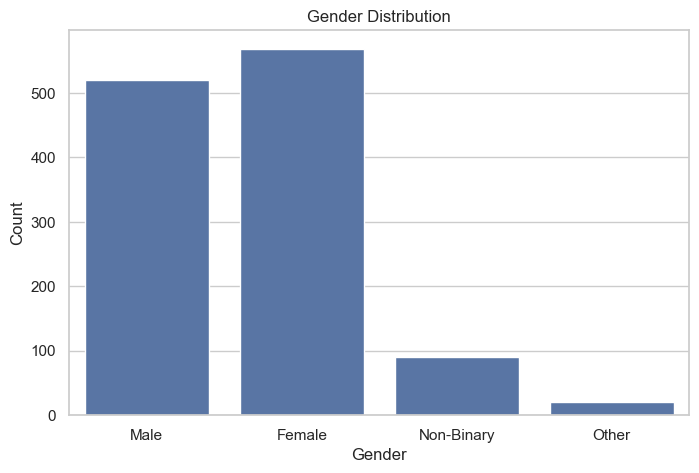

In [5072]:
# Generate a count plot showing the distribution of genders in the anxiety_data dataset

plt.figure(figsize=(8, 5))
sns.countplot(data=anxiety_data, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

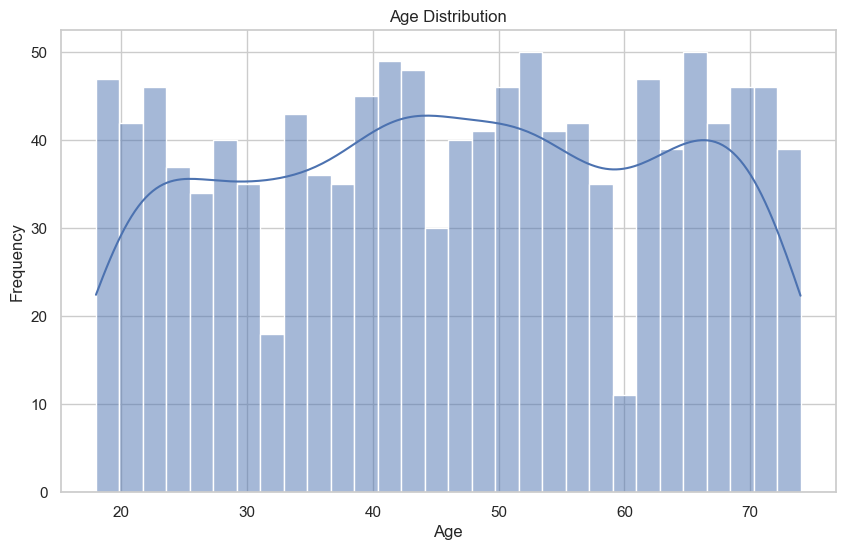

In [5073]:
#Create a histogram for the frequency of Age in the samples

plt.figure(figsize=(10, 6))
sns.histplot(anxiety_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Depression Score')

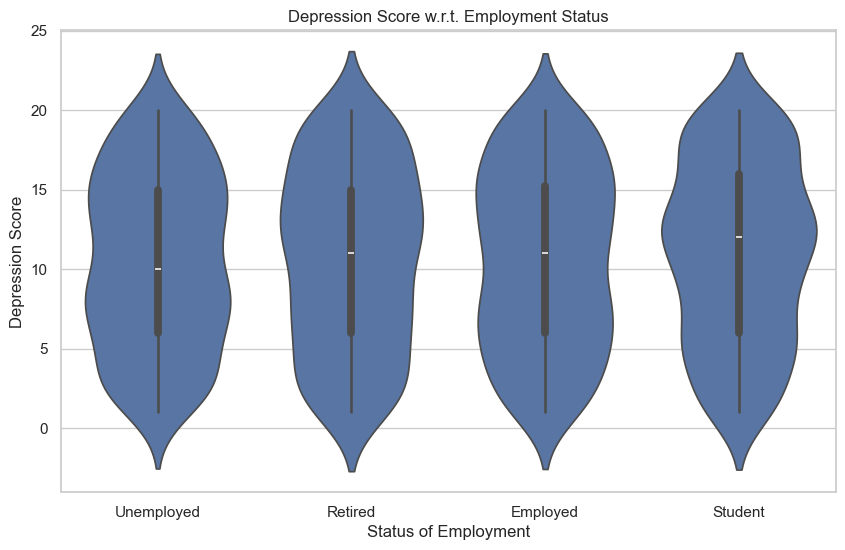

In [5074]:
# Create a violin plot showing the distribution of Depression_Score for each Employment_Status category

plt.figure(figsize=(10, 6))
sns.violinplot(data=anxiety_data, x='Employment_Status', y='Depression_Score')
plt.title('Depression Score w.r.t. Employment Status')
plt.xlabel('Status of Employment')
plt.ylabel('Depression Score')


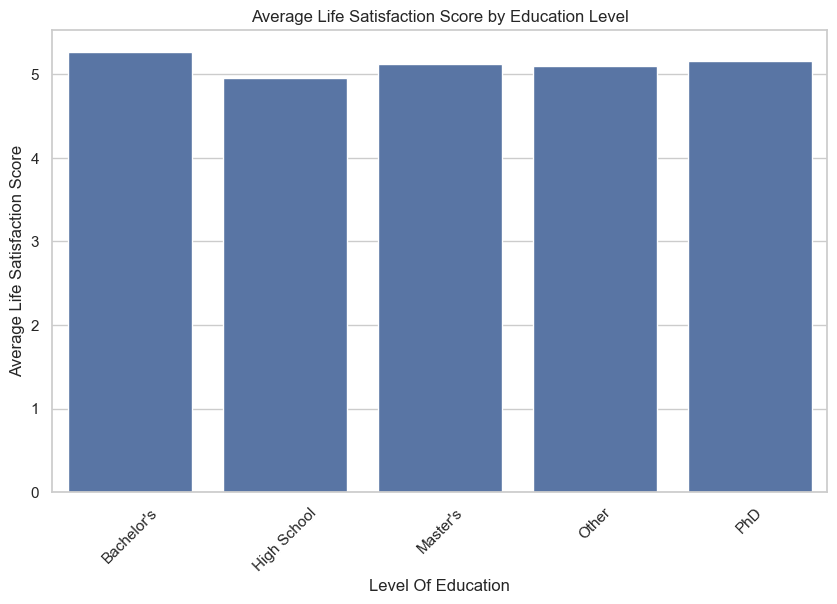

In [5075]:
# Create a bar plot showing education levels and their corresponding average life satisfaction scoresplt.show()

plt.figure(figsize=(10, 6))
avg_life_satisfaction = anxiety_data.groupby('Education_Level')['Life_Satisfaction_Score'].mean().reset_index()
sns.barplot(data=avg_life_satisfaction, x='Education_Level', y='Life_Satisfaction_Score')
plt.title('Average Life Satisfaction Score by Education Level')
plt.xlabel('Level Of Education')
plt.ylabel('Average Life Satisfaction Score')
plt.xticks(rotation=45)
plt.show()

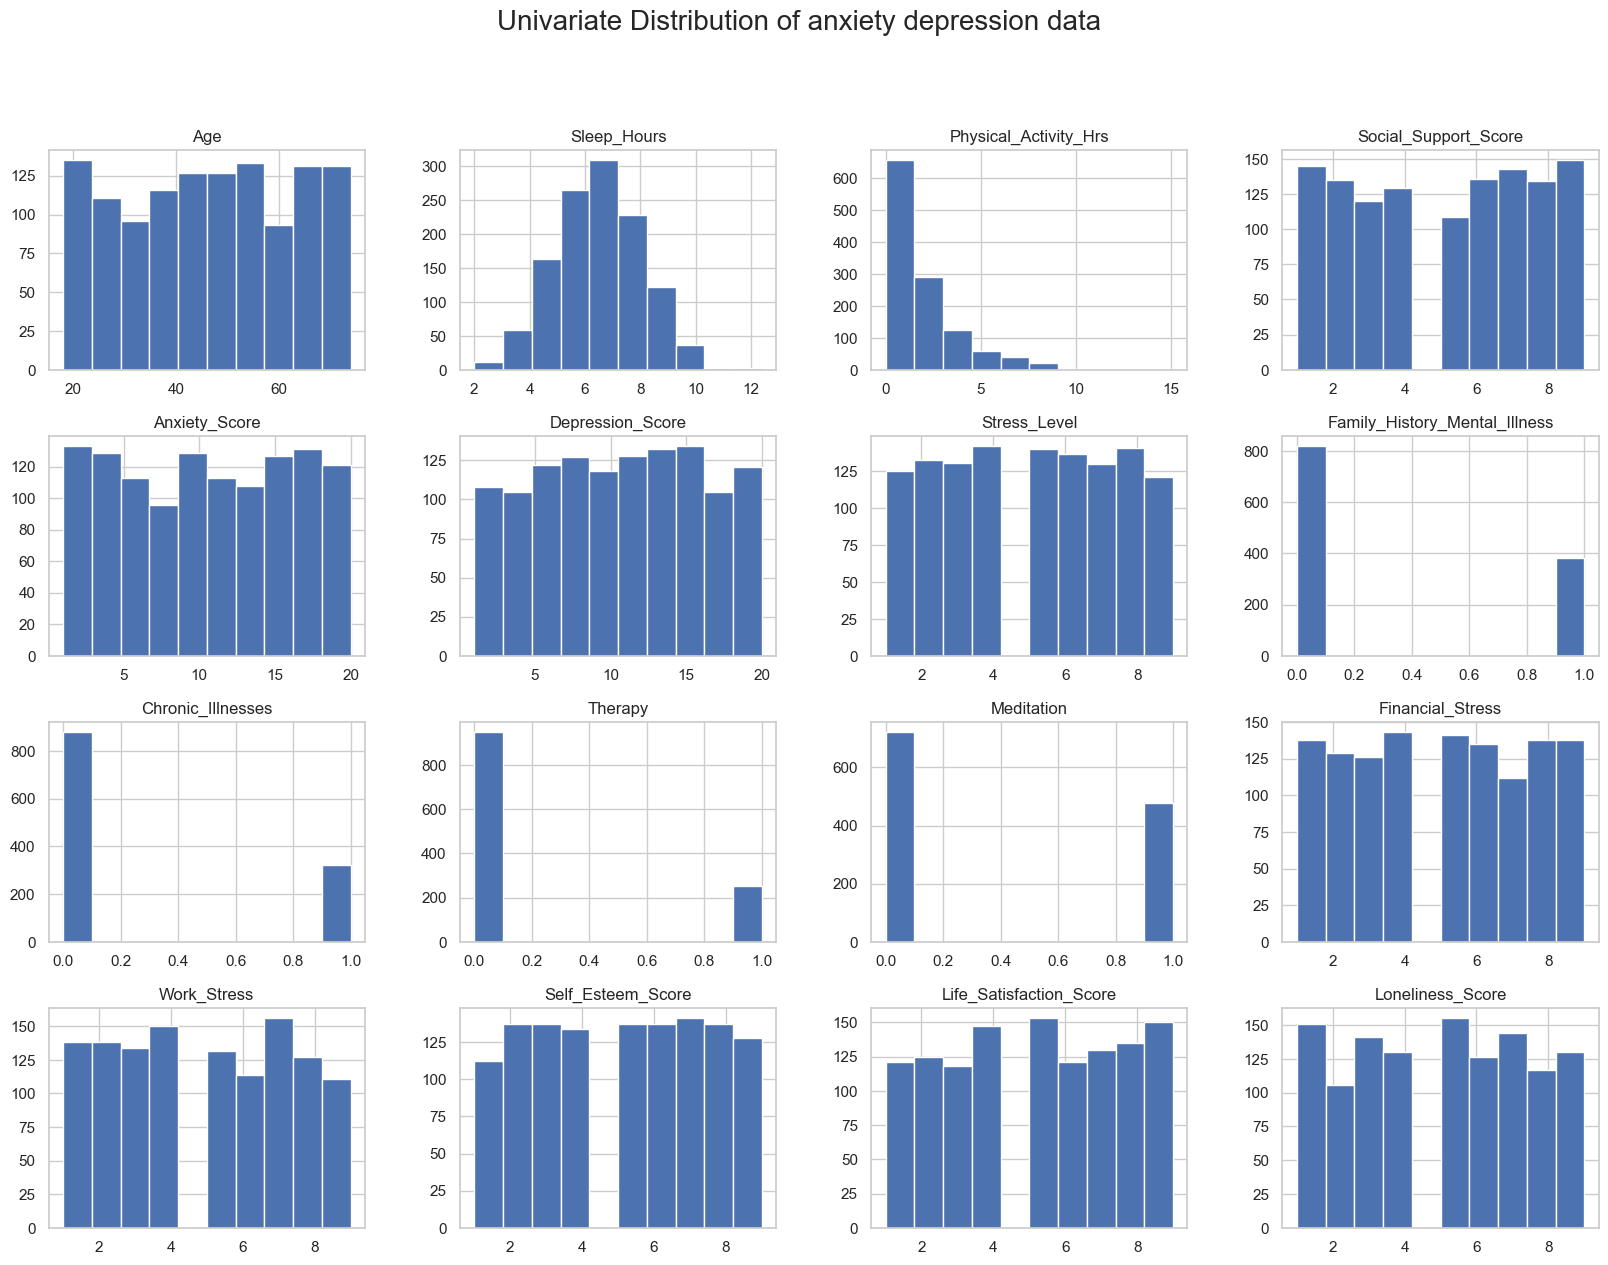

In [5076]:
# Univariate distribution for all the features in the data for numerical features.

anxiety_data.hist(figsize=(20, 14))
plt.suptitle('Univariate Distribution of anxiety depression data', fontsize=20)
plt.show()

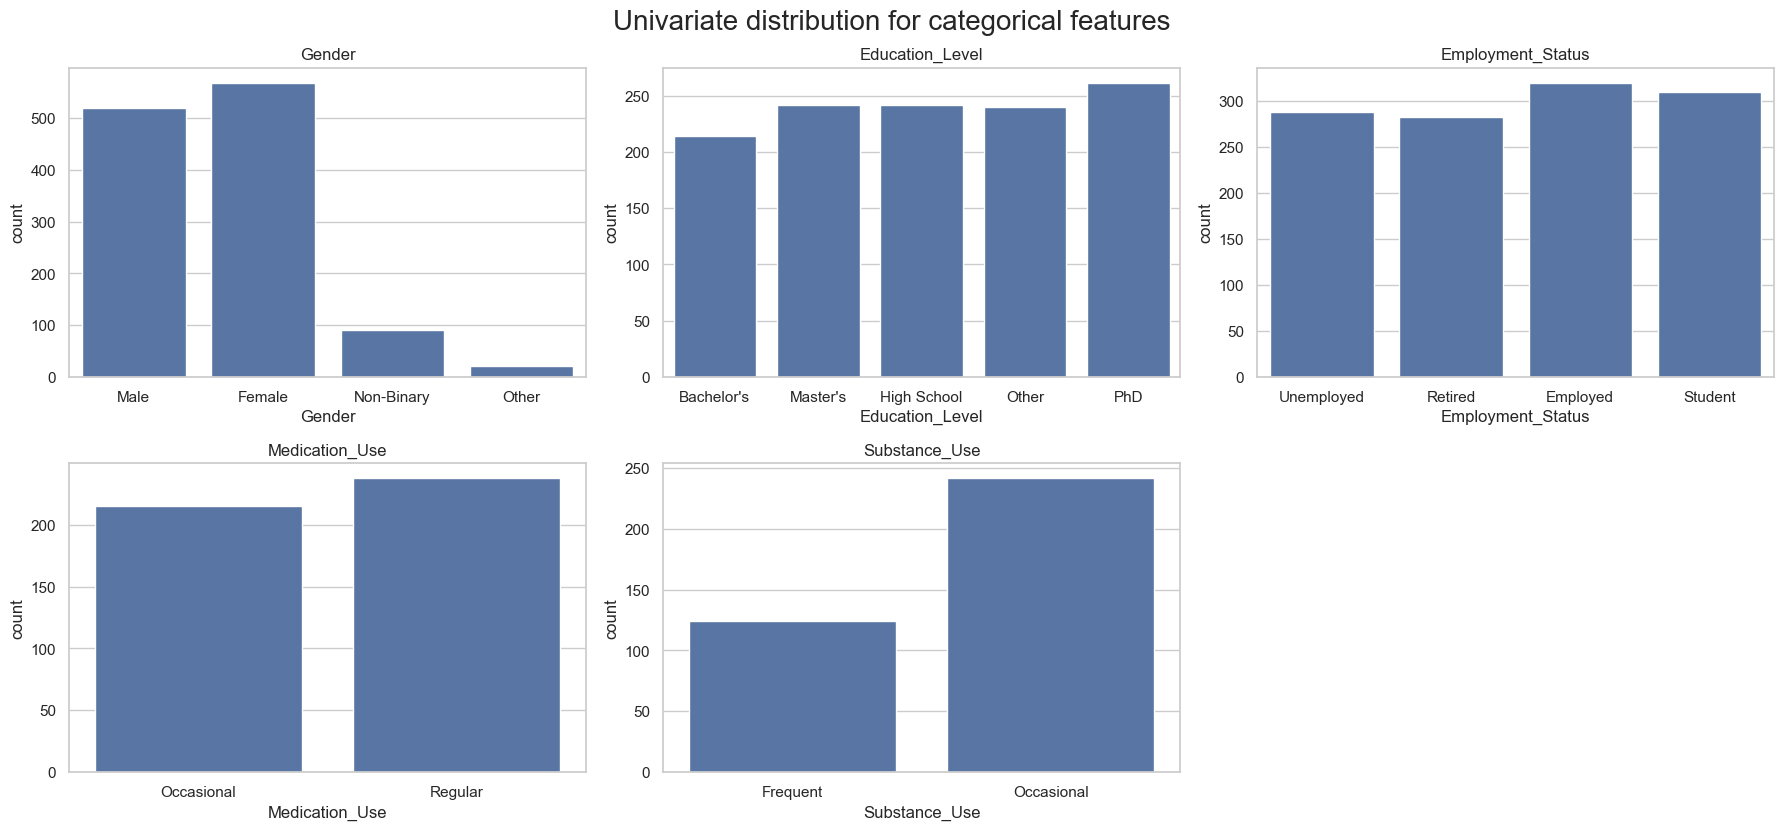

In [5077]:
# Univariate distribution for all the features in the data for categorical features.

categorical_data = anxiety_data.select_dtypes(include=['object'])

i = 1
plt.figure(figsize=(18, 12))
for col in categorical_data.columns:
    plt.subplot(3,3,i)
    sns.countplot(x=categorical_data[col])
    plt.title(col)
    i = i + 1
    
plt.suptitle('Univariate distribution for categorical features', fontsize=20)
plt.tight_layout()
plt.show()

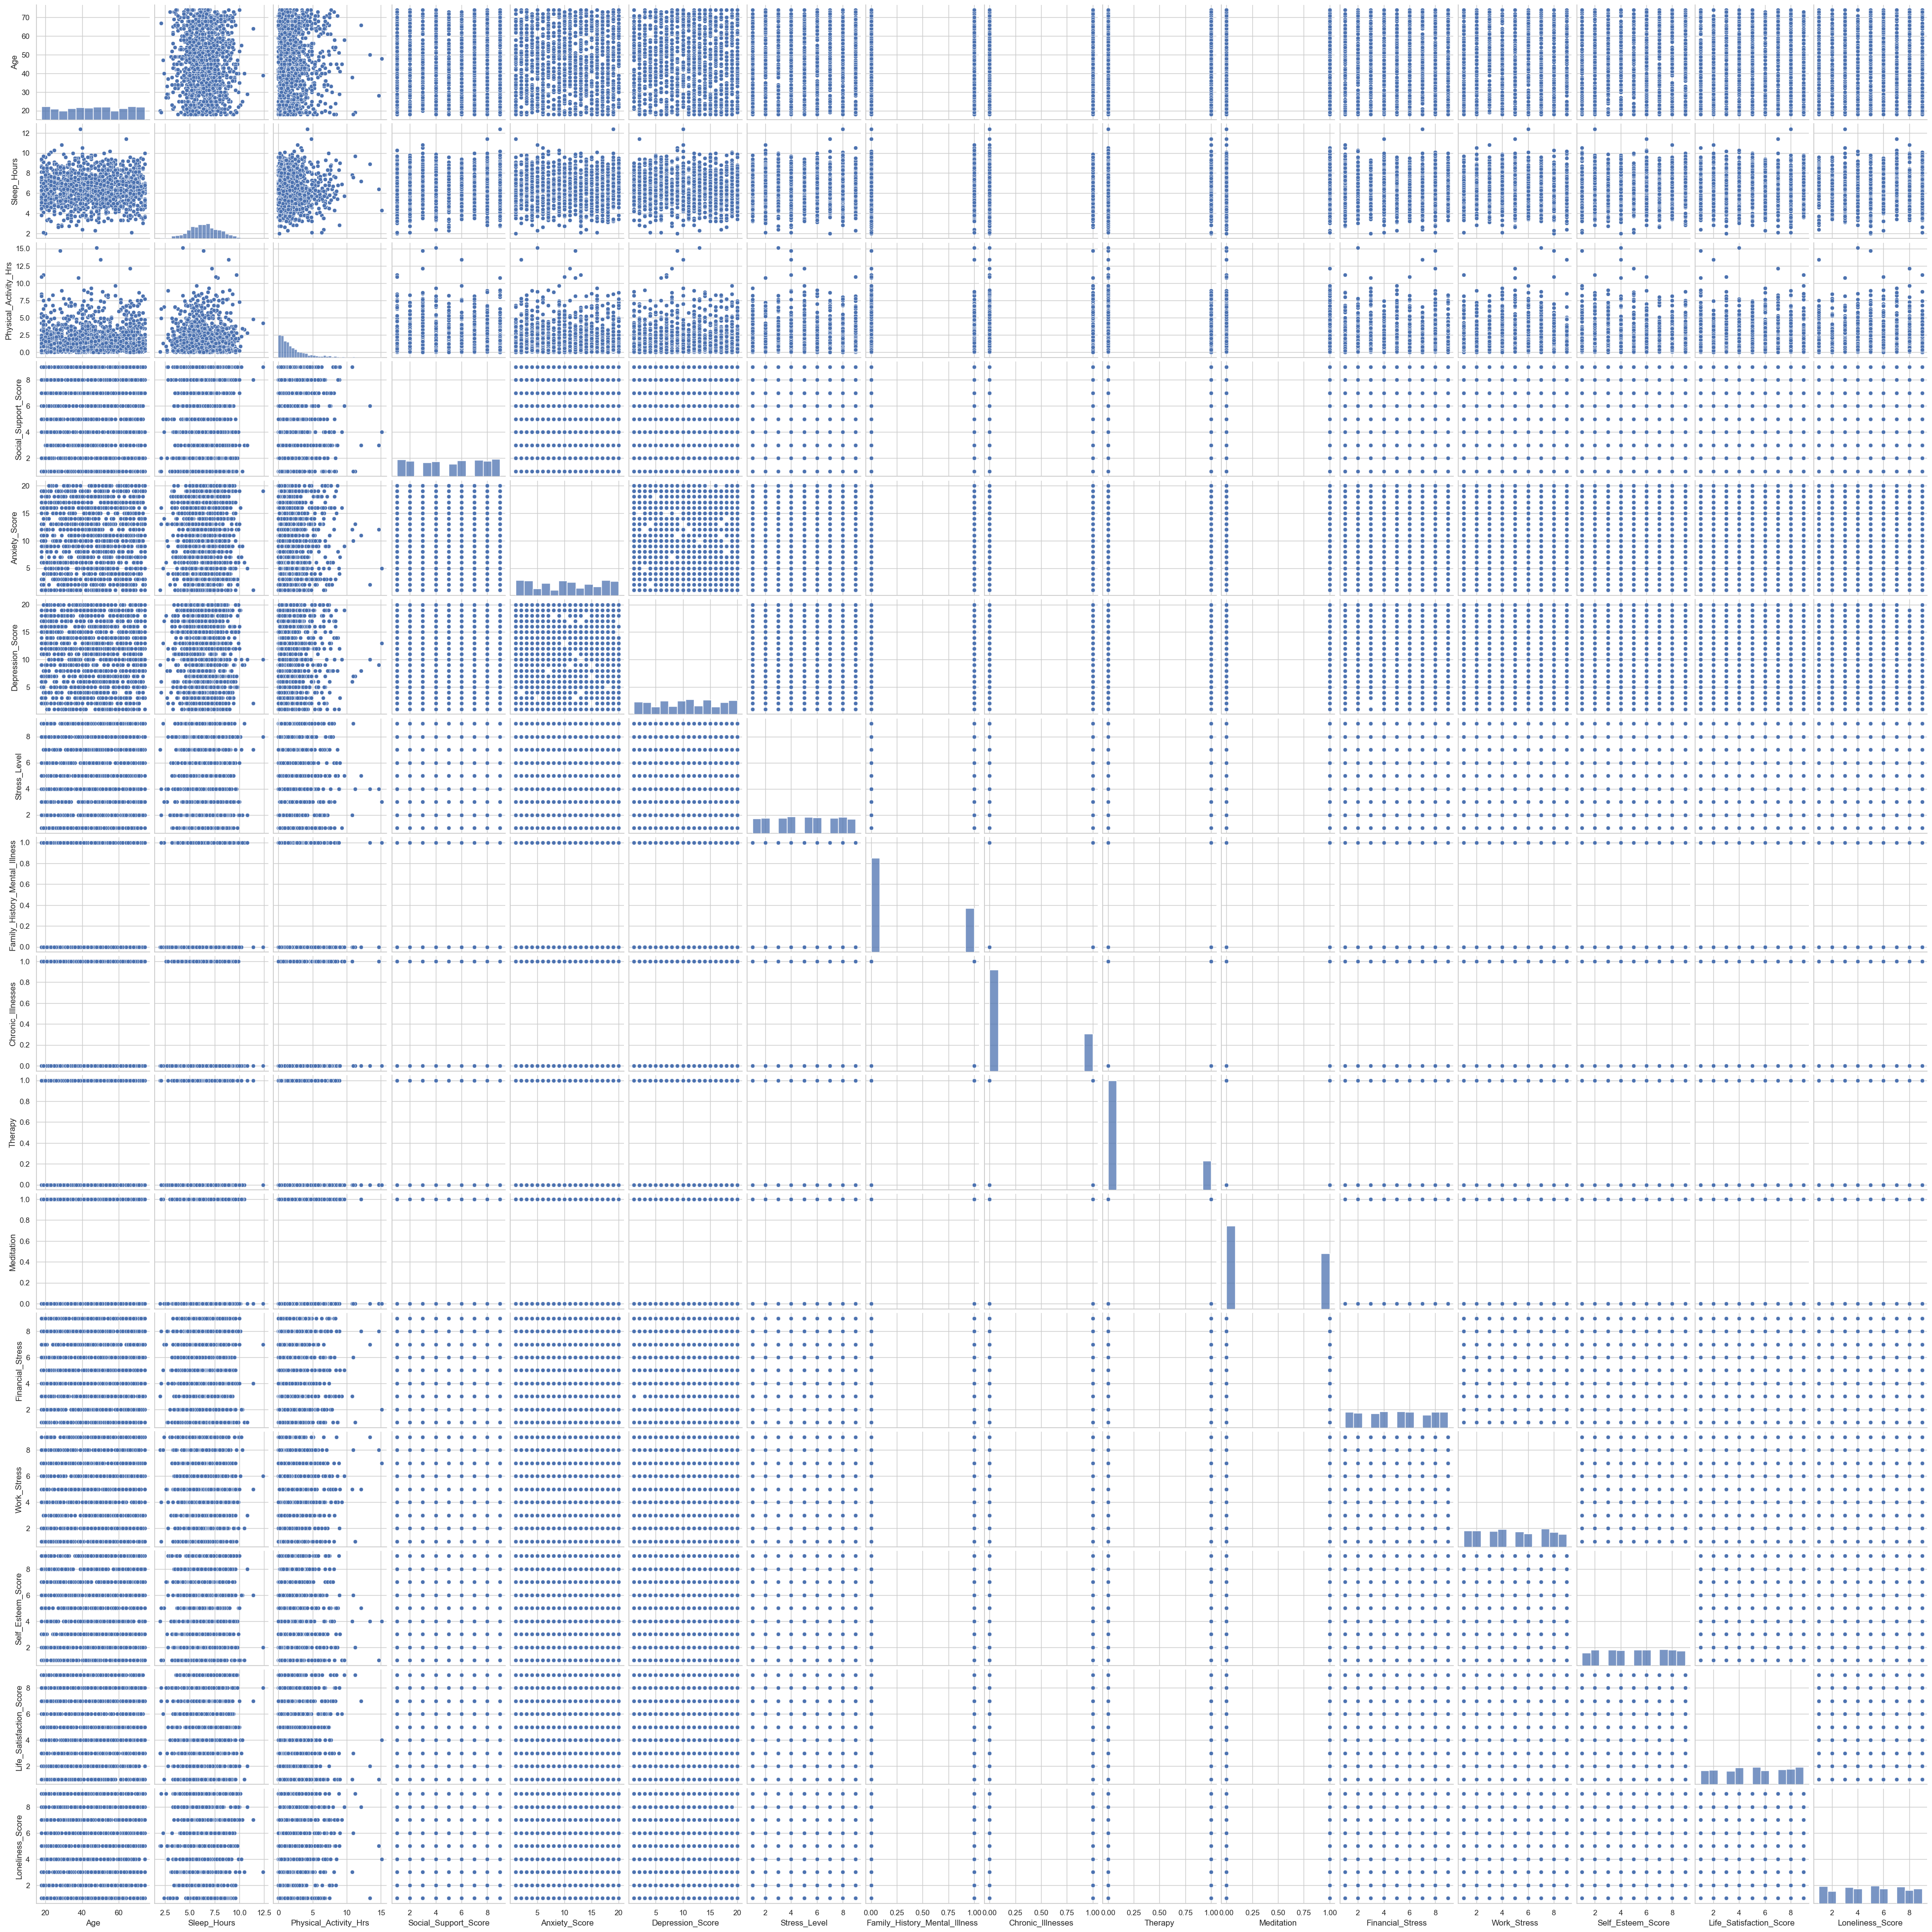

In [5078]:
# Bivariant plot - Creating a pairplot to visualize relationships between all variables

sns.pairplot(anxiety_data)
plt.show()

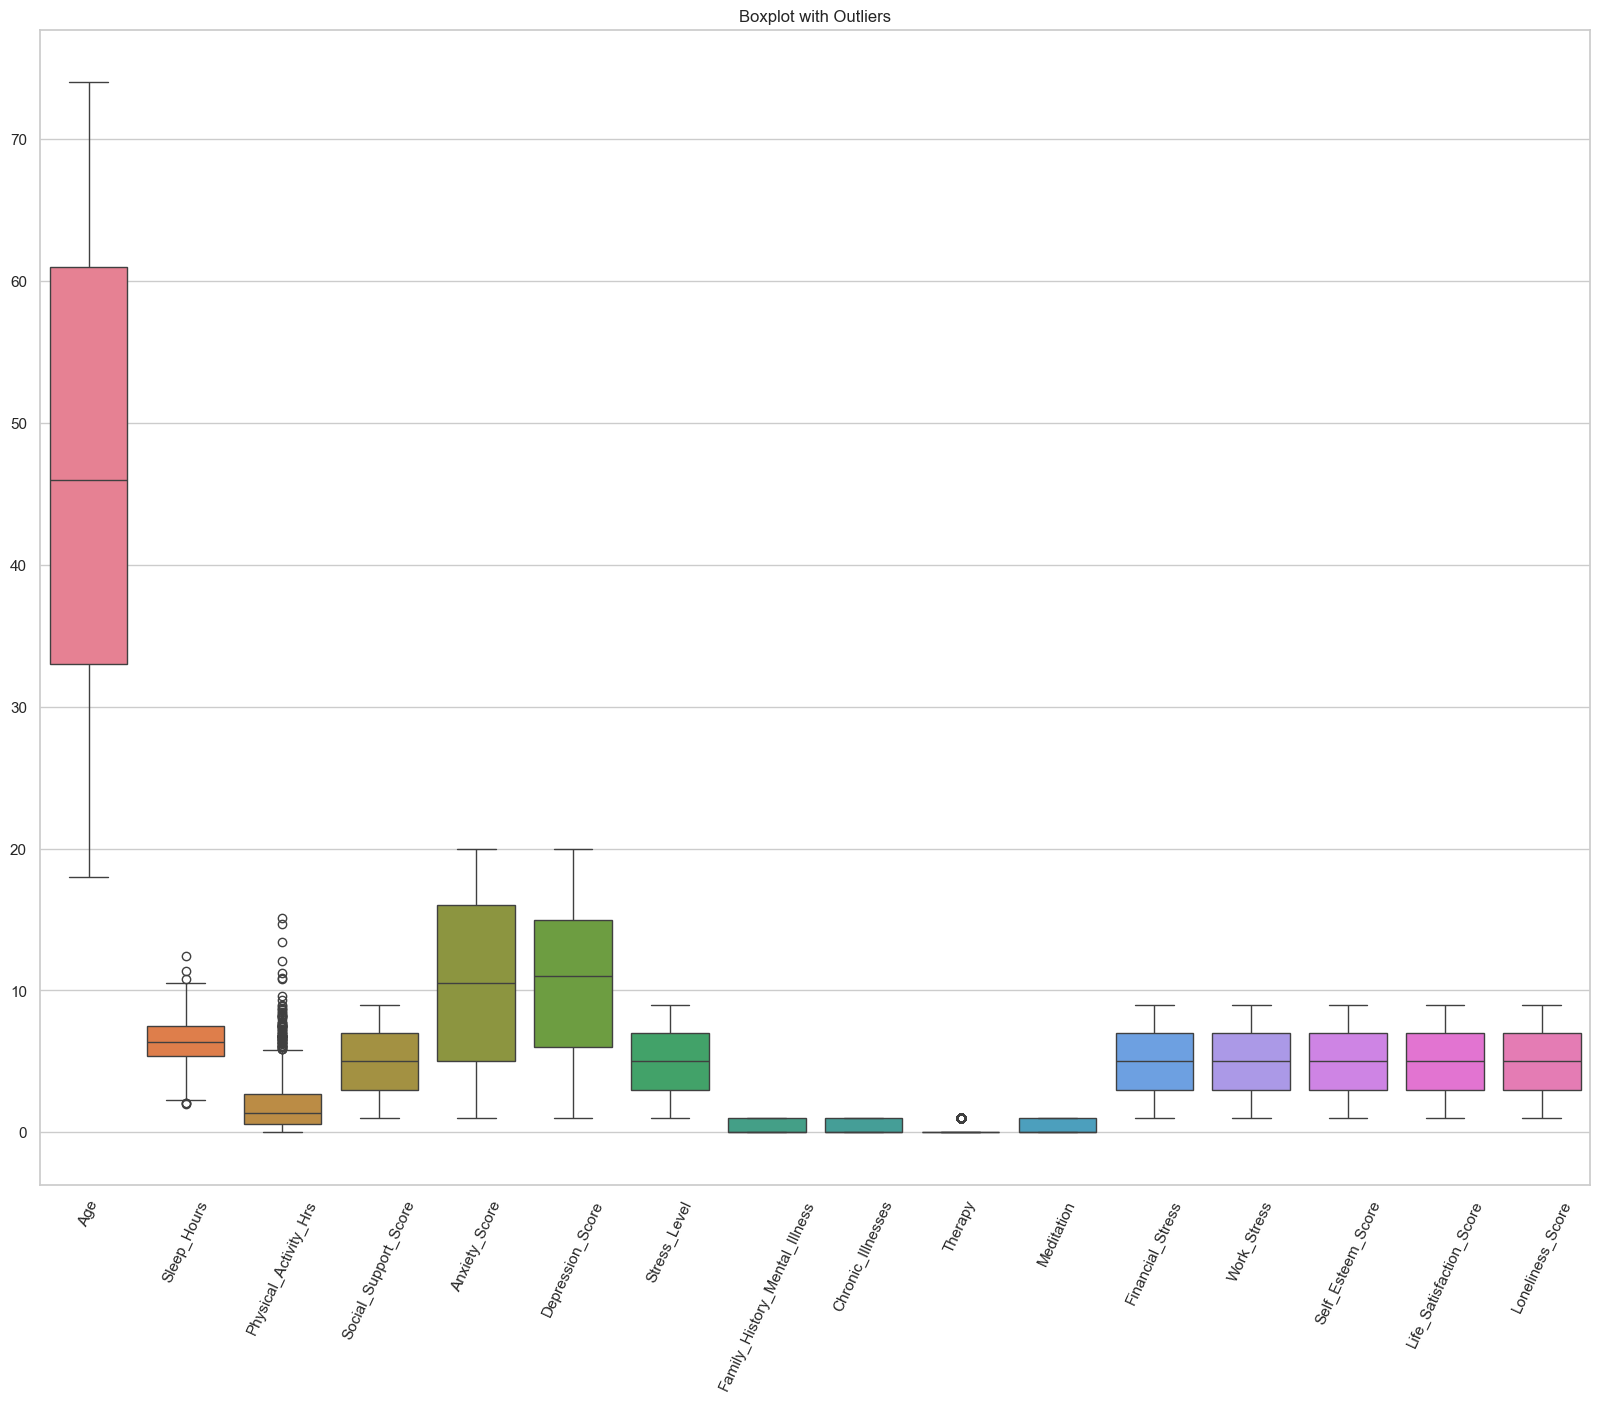

In [5079]:
# Boxplot to visualize the distribution and identify outliers in the anxiety_data dataset

plt.figure(figsize=(20,15))
sns.boxplot(data=anxiety_data)
plt.xticks(rotation = 65)
plt.title('Boxplot with Outliers')
plt.show()

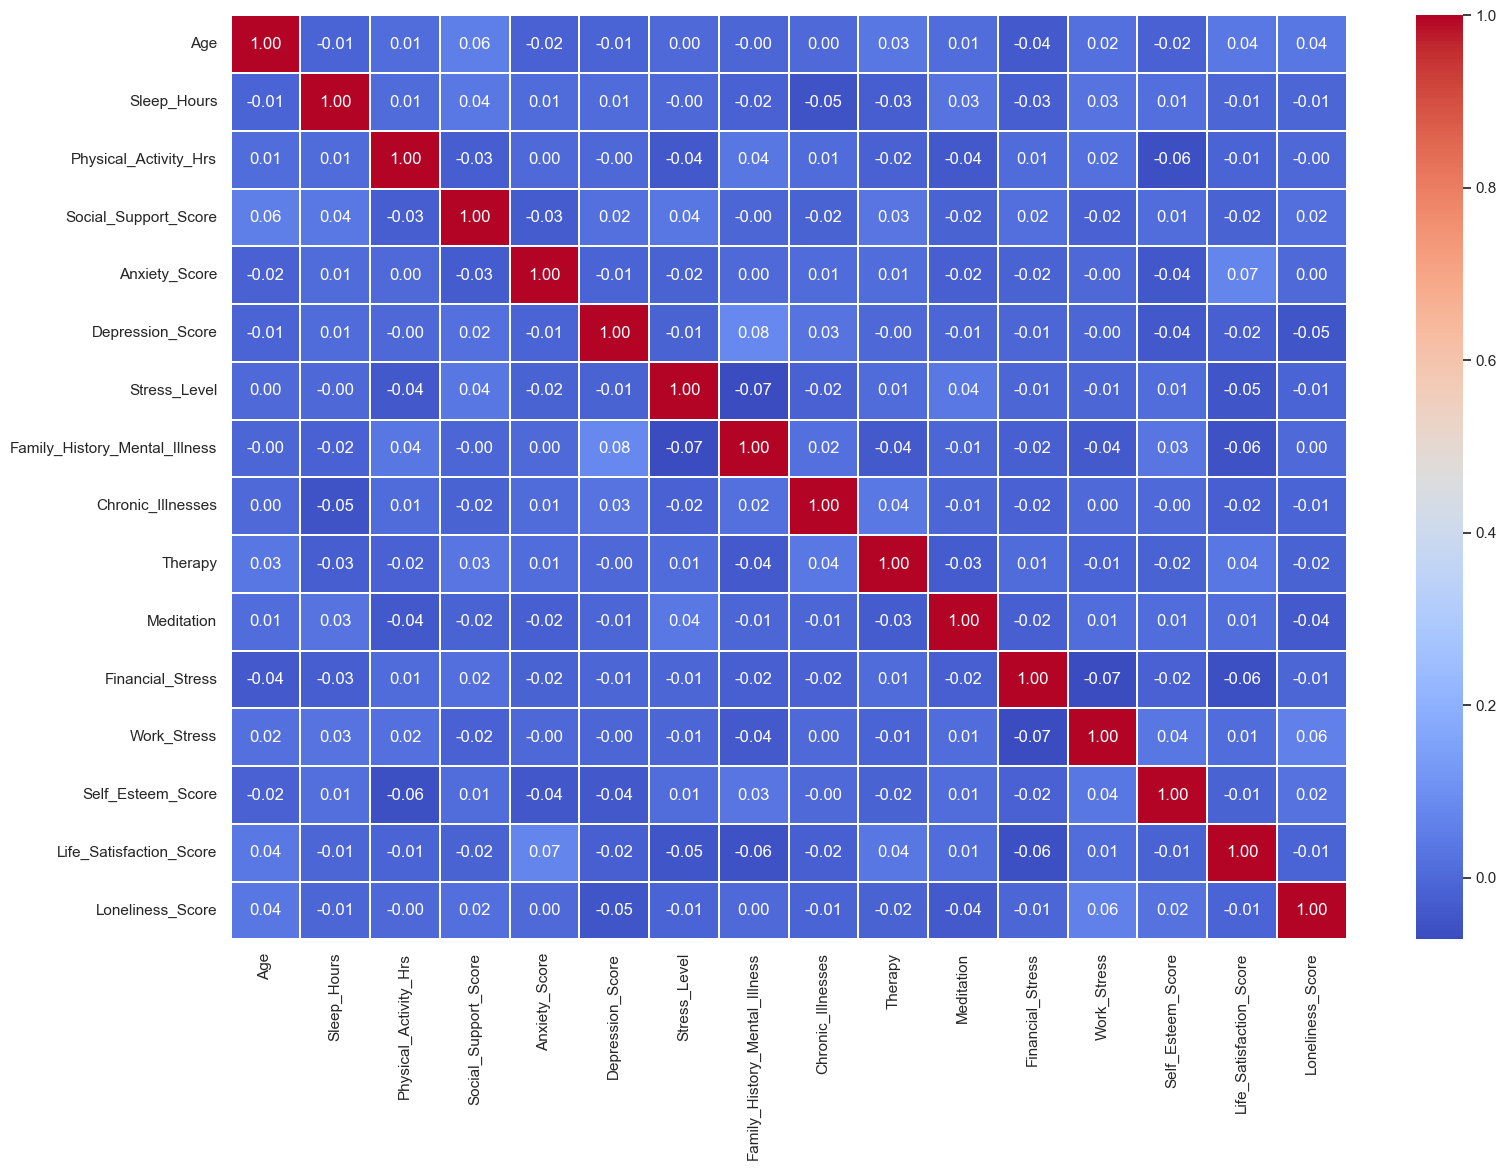

In [5080]:
# correlation between the features

plt.figure(figsize=(18,12))
sns.heatmap(data=continious_data.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.01)
plt.show()

<h1><u><i>Functions for ML models and Metrics to the data set</h1>

In [5082]:
# Convert the stress level feature from numeric to categorical type 

def stress_level_cate_conversion(data):
    label_mapping = {level: f"stress {level}" for level in data['Stress_Level'].unique()}
    print("Label Mapping:", label_mapping)
    data['Stress_Level'] = data['Stress_Level'].replace(label_mapping)
    return data

In [5083]:
# Splits the dataset into training and testing sets with label encoding for categorical features.

"""
    Parameters:
    -----------
    data : pandas.DataFrame -> The input dataset containing features and target variable 'Stress_Level'
        
    Returns:
    --------
    X_train, X_test, y_train, y_test : tuple of pandas.DataFrame/Series
        The split training and testing datasets
"""
def train_test_split_data(data):

    X = data.drop('Stress_Level', axis=1)
    y = data['Stress_Level']

    encoder = LabelEncoder()
    
    for col in data.select_dtypes(include=['object']).columns:
        X[col] = encoder.fit_transform(data[col])

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

    return X_train, X_test, y_train, y_test

In [5084]:
# LogOdds for Decisioon tree - combines the strengths of decision trees and logistic regression

class LogOddsDecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.root = None

    class Node:
        def __init__(self, depth=0):
            self.depth = depth
            self.feature = None
            self.threshold = None
            self.left = None
            self.right = None
            self.prediction = None

        def is_leaf(self):
            return self.prediction is not None

    """
        Fitting the nodes in the decision tree
        
        Parameters:
        X: DataFrame of features
        y: Series of target values
        depth: Depth of the decision tree
        used_features: set() to add once the feature is already learnt
    """
    def _fit_node(self, X, y, depth, used_features):
        node = self.Node(depth=depth)

        # Base cases: too shallow, no variety, or empty data
        if (
            depth >= self.max_depth
            or len(set(y)) == 1
            or X.empty
            or y.empty
            or len(y) < 2
            or X.shape[1] == 0
        ):
            node.prediction = y.mode()[0] if not y.empty else None
            return node

        # Extra safe: skip fitting if there's no data
        
        if X.shape[0] < 2:
            node.prediction = y.mode()[0]
            return node

        lr = LogisticRegression(max_iter=1000)
        try:
            lr.fit(X, y)
        except ValueError:
            node.prediction = y.mode()[0]
            return node

        coefs = np.abs(lr.coef_[0])
        remaining = [i for i in range(len(coefs)) if X.columns[i] not in used_features]

        if not remaining:
            node.prediction = y.mode()[0]
            return node

        best_idx = remaining[np.argmax(coefs[remaining])]
        node.feature = X.columns[best_idx]
        used_features.add(node.feature)

        node.threshold = X[node.feature].median()
        left_mask = X[node.feature] <= node.threshold
        right_mask = X[node.feature] > node.threshold

        # Handle corner cases where split gives nothing
        if left_mask.sum() == 0 or right_mask.sum() == 0:
            node.prediction = y.mode()[0]
            return node

        node.left = self._fit_node(X[left_mask], y[left_mask], depth + 1, used_features.copy())
        node.right = self._fit_node(X[right_mask], y[right_mask], depth + 1, used_features.copy())
        return node

    """
        Build the decision tree by fitting it to the training data
        
        Parameters:
        X: DataFrame of features
        y: Series of target values
    """
    def fit(self, X, y):
        self.root = self._fit_node(X, y, depth=0, used_features=set())

    """
        Recursively traverse the tree to predict the class for a single data point
        
        Parameters:
        node: Current node in the decision tree
        row: Single data point (pandas Series)
        
        Returns:
        Predicted class label
    """
    def _predict_row(self, node, row):
        if node.is_leaf():
            return node.prediction
        if row[node.feature] <= node.threshold:
            return self._predict_row(node.left, row)
        else:
            return self._predict_row(node.right, row)

    """
        Predict class labels for all samples in X
        
        Parameters:
        X: DataFrame of features
        
        Returns:
        Series of predicted class labels
    """
    def predict(self, X):
        return X.apply(lambda row: self._predict_row(self.root, row), axis=1)


In [5085]:
# Train and evaluate multiple machine learning models.

"""
    Parameters:
    -----------
    models : dict -> Dictionary of model name to model object mappings
    X_train : array-like -> Training features
    X_test : array-like -> Testing features
    y_train : array-like -> Training labels
    y_test : array-like -> Testing labels
        
    Returns:
    --------
    accuracy_data : dict -> Dictionary containing model names and their accuracy scores
"""
def ml_models(models, X_train, X_test, y_train, y_test):
    accuracy_data = {}

    for name, model in models.items():
        print(f"\n Training {name}...")

        if name == 'Decision Tree (Log-Odds Guided)':
            model.fit(pd.DataFrame(X_train), pd.Series(y_train))
            y_pred = model.predict(pd.DataFrame(X_test))
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        y_pred = np.array(y_pred).astype(y_test.dtype)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"{name} Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
        print("-" * 50)

        accuracy_data[name] = accuracy

    return accuracy_data


In [5086]:
# Calculate accuracy, precision, recall, and F1-score for multiple classification model and visualize the result using a bar plot.


"""    
    Parameters:
    -----------
    X_test : array-like -> Test features data
    y_test : array-like -> True labels for test data
    
    Returns:
    --------
    None : Displays a bar plot comparing model performance metrics
"""
def model_metrics(X_test, y_test):

    results = {
    "Classifier": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
    }
    
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
    
        y_pred = np.array(y_pred).astype(y_test.dtype)
    
        results["Classifier"].append(model_name)
        results["Accuracy"].append(accuracy_score(y_test, y_pred))
        results["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
        results["Recall"].append(recall_score(y_test, y_pred, average='weighted'))
        results["F1-Score"].append(f1_score(y_test, y_pred, average='weighted'))
    
    df_results = pd.DataFrame(results)
    df_melted = df_results.melt(id_vars="Classifier", var_name="Metric", value_name="Score")
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 12))
    sns.barplot(y="Classifier", x="Score", hue="Metric", data=df_melted, palette="viridis")
    
    plt.title("Comparison of Classifier Performance", fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Score")
    plt.legend(title="Metrics")
    
    plt.show()


In [5087]:
# Prints a formatted summary of model accuracy scores.

"""
    Parameters:
    -----------
    accuracy_dict : dict -> Dictionary with model names as keys and accuracy scores as values
"""
def accuracy_chat(accuracy_data):
    print("\nAccuracy Summary:")
    for model, score in accuracy_data.items():
        print(f"{model}: {score:.2f}")
        
    print("\n")  
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(accuracy_data.keys()), y=list(accuracy_data.values()), palette='coolwarm')
    plt.xticks(rotation=45)
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy Comparison")
    plt.show()

<h1><u><i>Machine Learning Model Training and Testing</i></u>

<h3> ML Metrics for target feature [Stress level] is Numeric

In [5090]:
# Dictionary to store accuracy scores for different preprocessing approaches
accuracy_scored_data = {}

# Create a copy of anxiety_data without applying compute transformations
anxiety_data_no_compute = anxiety_data.copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_data(anxiety_data_no_compute)

# Train and evaluate multiple machine learning models on the data
accuracy_data = ml_models(models, X_train, X_test, y_train, y_test)

# Store the accuracy results with a key indicating no compute transformations were applied
accuracy_scored_data["Labels are Numeric"] = accuracy_data



 Training Logistic Regression...
Logistic Regression Accuracy: 0.1222
              precision    recall  f1-score   support

           1       0.15      0.10      0.12        39
           2       0.07      0.11      0.08        37
           3       0.14      0.25      0.18        32
           4       0.14      0.18      0.16        44
           5       0.07      0.07      0.07        41
           6       0.09      0.06      0.07        49
           7       0.21      0.10      0.13        41
           8       0.15      0.17      0.16        36
           9       0.16      0.10      0.12        41

    accuracy                           0.12       360
   macro avg       0.13      0.13      0.12       360
weighted avg       0.13      0.12      0.12       360

--------------------------------------------------

 Training Random Forest...
Random Forest Accuracy: 0.1250
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        39
     


Accuracy Summary:
Logistic Regression: 0.12
Random Forest: 0.12
Support Vector Machine: 0.12
K-Nearest Neighbors: 0.11
Naive Bayes: 0.13
Decision Tree (Log-Odds Guided): 0.09




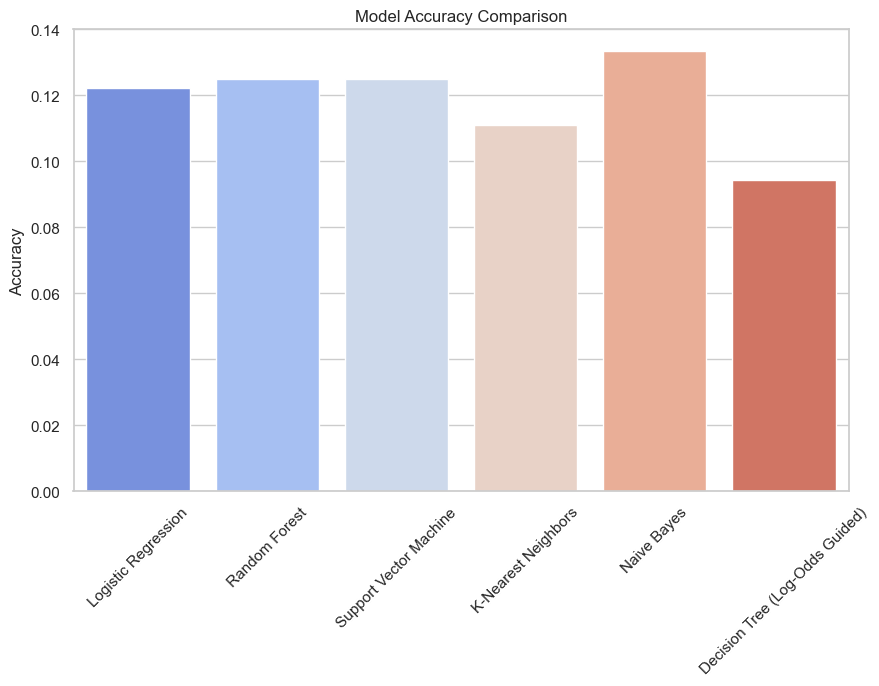

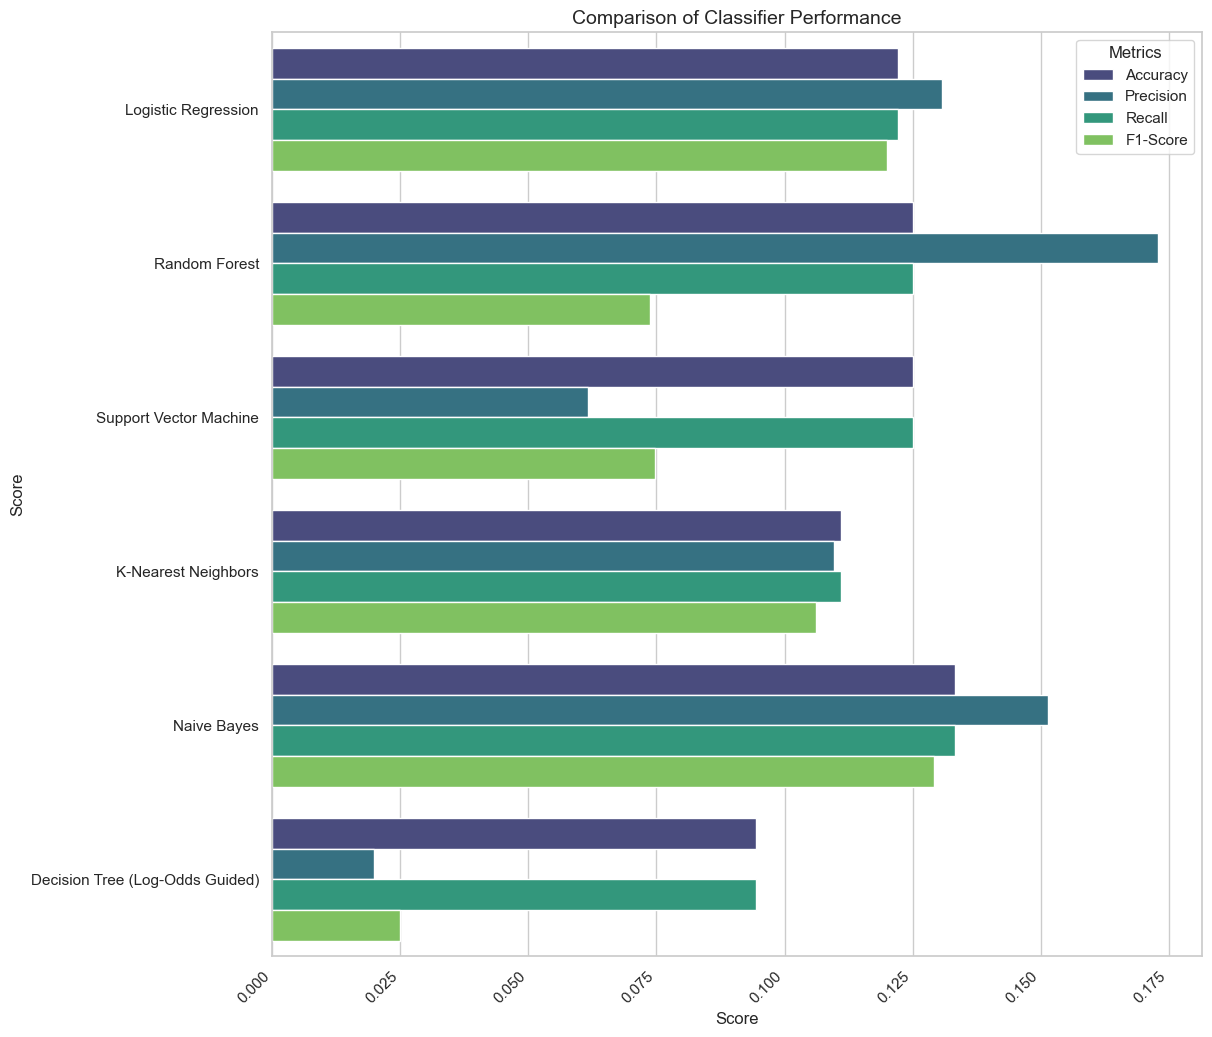

In [5091]:
# Visualize the accuracy results of different models
accuracy_chat(accuracy_data)

# Calculate and display additional performance metrics for the models
model_metrics(X_test, y_test)

<h3>Changed the target feature [Stress Level] into Categorical value.

In [5093]:
# Target convert from numeric to categorical

# Create a copy of the original dataset to work with
anxiety_data_cat_labels = anxiety_data.copy()

# Fill missing values in Medication_Use column with the most frequent value (mode)
anxiety_data_cat_labels['Medication_Use'] = anxiety_data_cat_labels['Medication_Use'].fillna(anxiety_data_cat_labels['Medication_Use'].mode()[0])

# Fill missing values in Substance_Use column with the most frequent value (mode)
anxiety_data_cat_labels['Substance_Use'] = anxiety_data_cat_labels['Substance_Use'].fillna(anxiety_data_cat_labels['Substance_Use'].mode()[0])

# Convert stress level from numeric to categorical using a custom function
anxiety_data_cat_labels = stress_level_cate_conversion(anxiety_data_cat_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_data(anxiety_data_cat_labels)

# Train and evaluate multiple machine learning models on the dataset
accuracy_data = ml_models(models, X_train, X_test, y_train, y_test)

# Store the accuracy results in a dictionary for later comparison
accuracy_scored_data["Labels are Categorical"] = accuracy_data

Label Mapping: {9: 'stress 9', 6: 'stress 6', 8: 'stress 8', 4: 'stress 4', 3: 'stress 3', 1: 'stress 1', 7: 'stress 7', 5: 'stress 5', 2: 'stress 2'}

 Training Logistic Regression...
Logistic Regression Accuracy: 0.8056
              precision    recall  f1-score   support

    stress 1       1.00      1.00      1.00        39
    stress 2       1.00      0.86      0.93        37
    stress 3       0.71      0.94      0.81        32
    stress 4       0.76      0.73      0.74        44
    stress 5       0.57      0.49      0.53        41
    stress 6       0.66      0.63      0.65        49
    stress 7       0.78      0.78      0.78        41
    stress 8       0.87      0.92      0.89        36
    stress 9       0.93      1.00      0.96        41

    accuracy                           0.81       360
   macro avg       0.81      0.82      0.81       360
weighted avg       0.80      0.81      0.80       360

--------------------------------------------------

 Training Random Fore


Accuracy Summary:
Logistic Regression: 0.81
Random Forest: 0.62
Support Vector Machine: 0.26
K-Nearest Neighbors: 0.18
Naive Bayes: 0.40
Decision Tree (Log-Odds Guided): 0.19




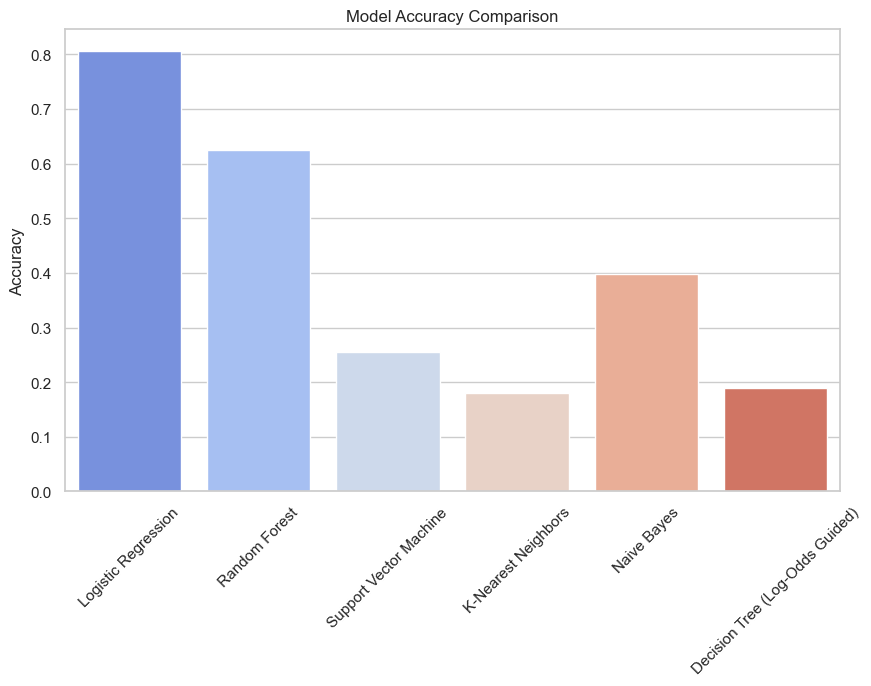

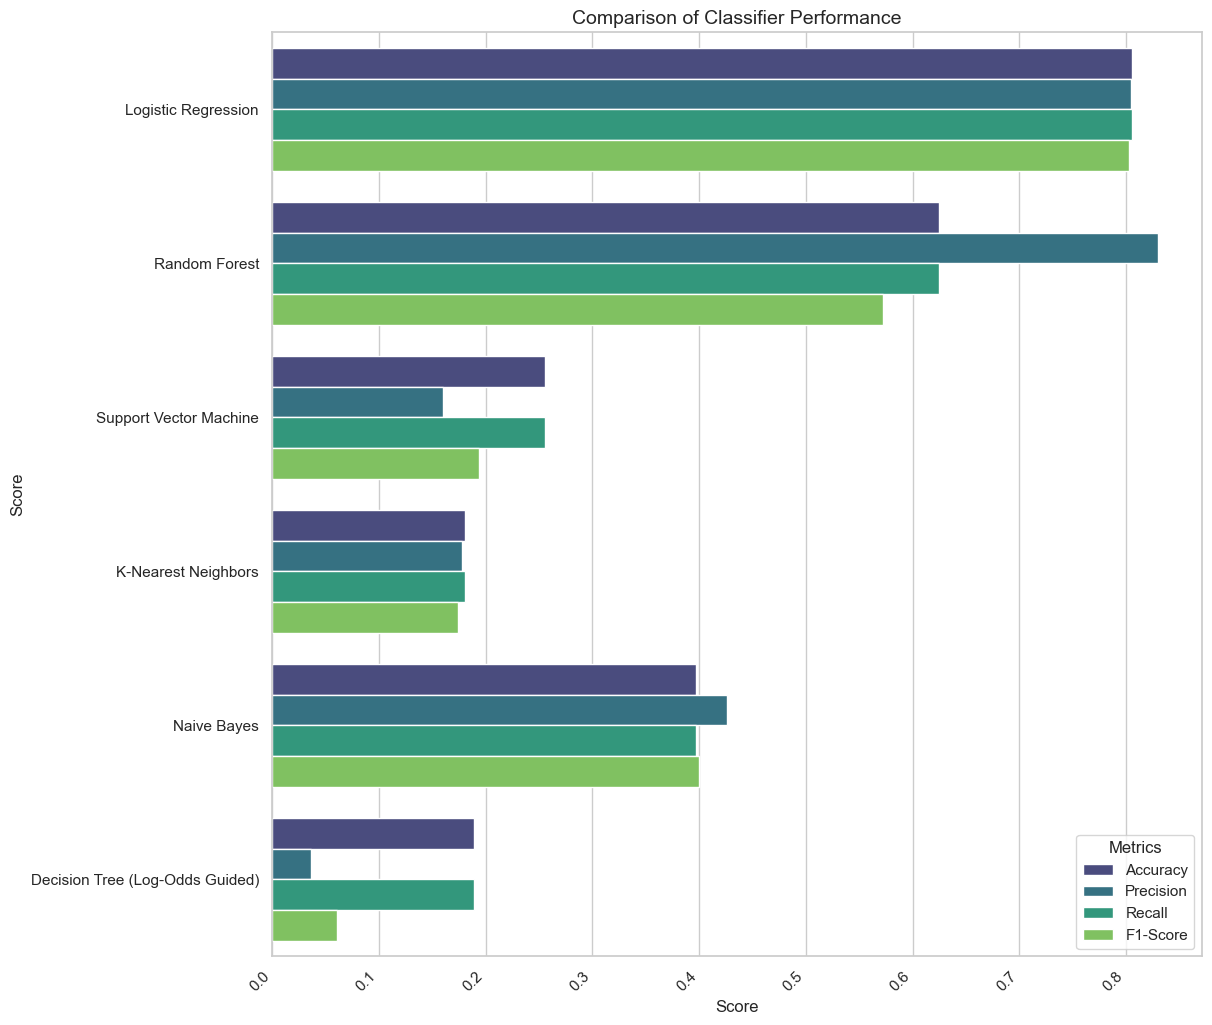

In [5094]:
# Visualize the accuracy results of different models
accuracy_chat(accuracy_data)

# Calculate and display additional performance metrics for the models
model_metrics(X_test, y_test)

<h2><u><i>KNN Impute with N neighbors</i></u> 

In [5096]:
# This function converts categorical data to numerical values

"""
    Parameters:
    -----------
    categorical_columns: list of column names containing categorical data
    dataset: the pandas DataFrame containing the data
      
    Returns:
    --------
    dataset: the modified DataFrame with converted columns
"""

def categorical_to_numeric(categorical_columns, dataset):

    for col in categorical_columns:
        dataset[col] = dataset[col].astype('category').cat.codes.replace({-1: np.nan})
        
    return dataset


In [5097]:
# Impute missing values in a dataset using K-Nearest Neighbors algorithm.

"""  
    Parameters:
    -----------
    n : int -> Number of neighbors to use for imputation
    data : pandas.DataFrame -> The dataset containing missing values to be imputed
        
    Returns:
    --------
    pandas.DataFrame -> A new DataFrame with imputed values replacing NaN values
"""
def knn_imputater(n, data):
    imputer = KNNImputer(n_neighbors = n)
    numpy_data = imputer.fit_transform(data)
    data = pd.DataFrame(numpy_data, columns = data.columns)
    data.isna().sum()
    return data


<h3> KNN compute with 5 neighbors on categorical target

In [5099]:

# Create a copy of the original anxiety dataset to avoid modifying the original
anxiety_data_copy = anxiety_data.copy()

# Extract categorical columns (object dtype) from the dataset
categorical_data = anxiety_data_copy.select_dtypes(include=['object'])

# Convert categorical data to numeric format for processing
anxiety_data_copy = categorical_to_numeric(categorical_data, anxiety_data_copy)

# Apply KNN imputation with 5 neighbors to handle missing values
anxiety_data_copy = knn_imputater(5, anxiety_data_copy)

# Convert stress level to categorical format for classification
anxiety_data_copy = stress_level_cate_conversion(anxiety_data_copy)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_data(anxiety_data_copy)

# Train and evaluate multiple machine learning models
accuracy_data = ml_models(models, X_train, X_test, y_train, y_test)

# Store the accuracy results in the accuracy_scored_data dictionary with key "knn compute"
accuracy_scored_data["KNN compute with 5 Neighbors on categorical label"] = accuracy_data

Label Mapping: {9.0: 'stress 9.0', 6.0: 'stress 6.0', 8.0: 'stress 8.0', 4.0: 'stress 4.0', 3.0: 'stress 3.0', 1.0: 'stress 1.0', 7.0: 'stress 7.0', 5.0: 'stress 5.0', 2.0: 'stress 2.0'}

 Training Logistic Regression...
Logistic Regression Accuracy: 0.8611
              precision    recall  f1-score   support

  stress 1.0       0.97      1.00      0.99        39
  stress 2.0       1.00      0.95      0.97        37
  stress 3.0       0.79      0.94      0.86        32
  stress 4.0       0.86      0.73      0.79        44
  stress 5.0       0.60      0.59      0.59        41
  stress 6.0       0.72      0.73      0.73        49
  stress 7.0       0.95      0.95      0.95        41
  stress 8.0       0.94      0.94      0.94        36
  stress 9.0       0.95      1.00      0.98        41

    accuracy                           0.86       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.86      0.86      0.86       360

-------------------------------------


Accuracy Summary:
Logistic Regression: 0.86
Random Forest: 0.60
Support Vector Machine: 0.26
K-Nearest Neighbors: 0.19
Naive Bayes: 0.40
Decision Tree (Log-Odds Guided): 0.24




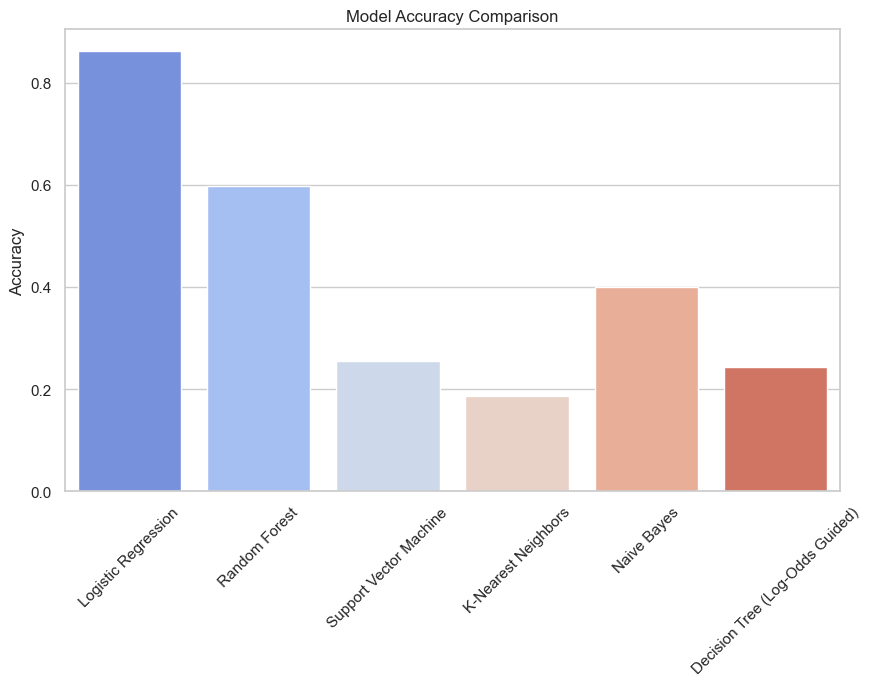

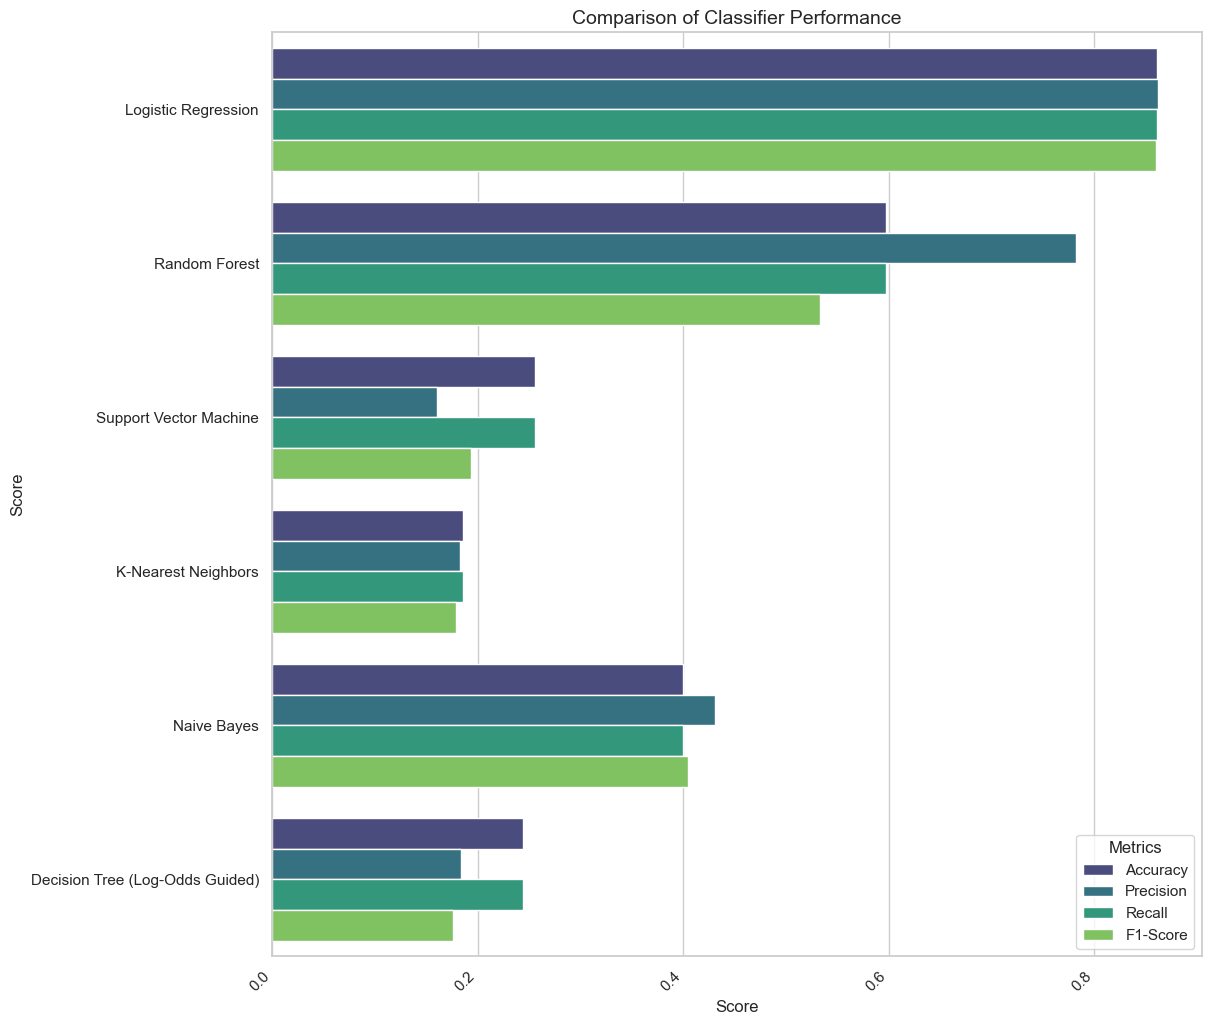

In [5100]:
# Visualize the accuracy results of different models
accuracy_chat(accuracy_data)

# Calculate and display additional performance metrics for the models
model_metrics(X_test, y_test)

<h2> <u><i>Correlation for the features w.r.t stress levels</i></u>

In [5102]:
#  Filter features based on their correlation with a target column.

"""    
    Parameters:
    -----------
    data : pandas.DataFrame -> The input dataset to analyze
    target_col : str, default='Stress_Level' -> The target column to calculate correlations against
    threshold : float, default=0.01 -> Minimum absolute correlation value to keep a feature
        
    Returns:
    --------
    pandas.DataFrame -> Dataset containing only features with correlation > threshold
"""

def correlation_calculation(data, target_col='Stress_Level', threshold=0.01):
    
    numeric_data = data.copy()
    
    for col in numeric_data.select_dtypes(include=['object', 'category']).columns:
        numeric_data[col] = LabelEncoder().fit_transform(numeric_data[col].astype(str))
    
    correlations = numeric_data.corr()[target_col]
    
    filtered_features = correlations[abs(correlations) > threshold].index.tolist()
    
    if target_col not in filtered_features:
        filtered_features.append(target_col)
    
    return data[filtered_features]


<h3> calculate feature importance on KNN imputation with threshold > 0.01

In [5104]:
# This section calculates feature importance for KNN model with threshold > 0.01

# Create a copy of the anxiety dataset to avoid modifying the original
feature_importance_data = anxiety_data_copy.copy()

# Calculate correlations between features
feature_importance_data = correlation_calculation(feature_importance_data)

# Convert stress level to categorical values
feature_importance_data = stress_level_cate_conversion(feature_importance_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_data(feature_importance_data)

# Train and evaluate multiple machine learning models
accuracy_data = ml_models(models, X_train, X_test, y_train, y_test)

# Store the accuracy results in the accuracy_scored_data dictionary with a descriptive key
accuracy_scored_data["Feature importance > 0.01 on KNN compute with 5 neighbors"] = accuracy_data


Label Mapping: {'stress 9.0': 'stress stress 9.0', 'stress 6.0': 'stress stress 6.0', 'stress 8.0': 'stress stress 8.0', 'stress 4.0': 'stress stress 4.0', 'stress 3.0': 'stress stress 3.0', 'stress 1.0': 'stress stress 1.0', 'stress 7.0': 'stress stress 7.0', 'stress 5.0': 'stress stress 5.0', 'stress 2.0': 'stress stress 2.0'}

 Training Logistic Regression...
Logistic Regression Accuracy: 0.9861
                   precision    recall  f1-score   support

stress stress 1.0       1.00      1.00      1.00        39
stress stress 2.0       1.00      1.00      1.00        37
stress stress 3.0       1.00      1.00      1.00        32
stress stress 4.0       0.98      1.00      0.99        44
stress stress 5.0       0.95      0.93      0.94        41
stress stress 6.0       0.96      0.96      0.96        49
stress stress 7.0       1.00      1.00      1.00        41
stress stress 8.0       1.00      1.00      1.00        36
stress stress 9.0       1.00      1.00      1.00        41

      


Accuracy Summary:
Logistic Regression: 0.99
Random Forest: 0.73
Support Vector Machine: 0.45
K-Nearest Neighbors: 0.27
Naive Bayes: 0.45
Decision Tree (Log-Odds Guided): 0.20




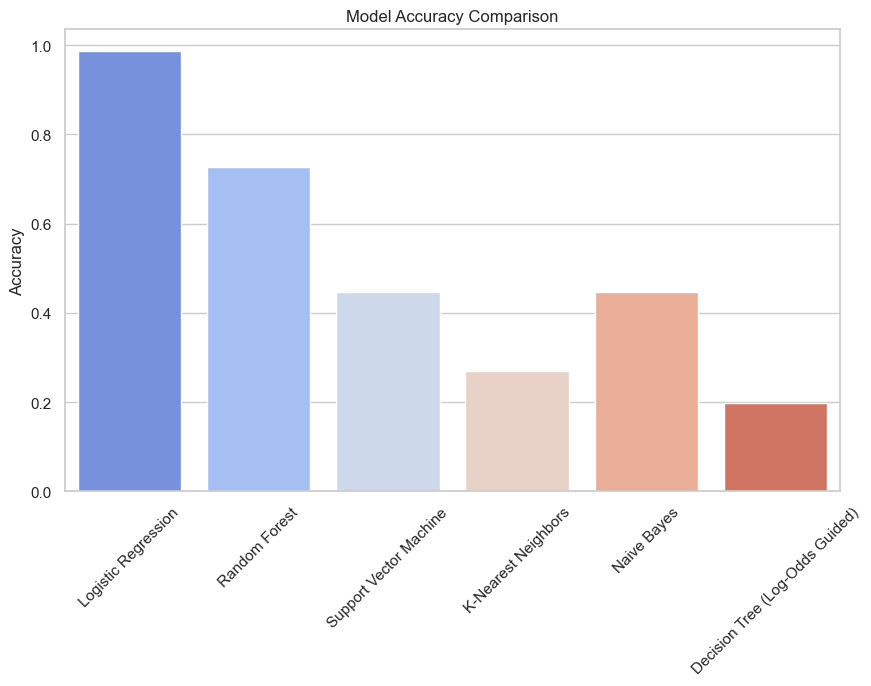

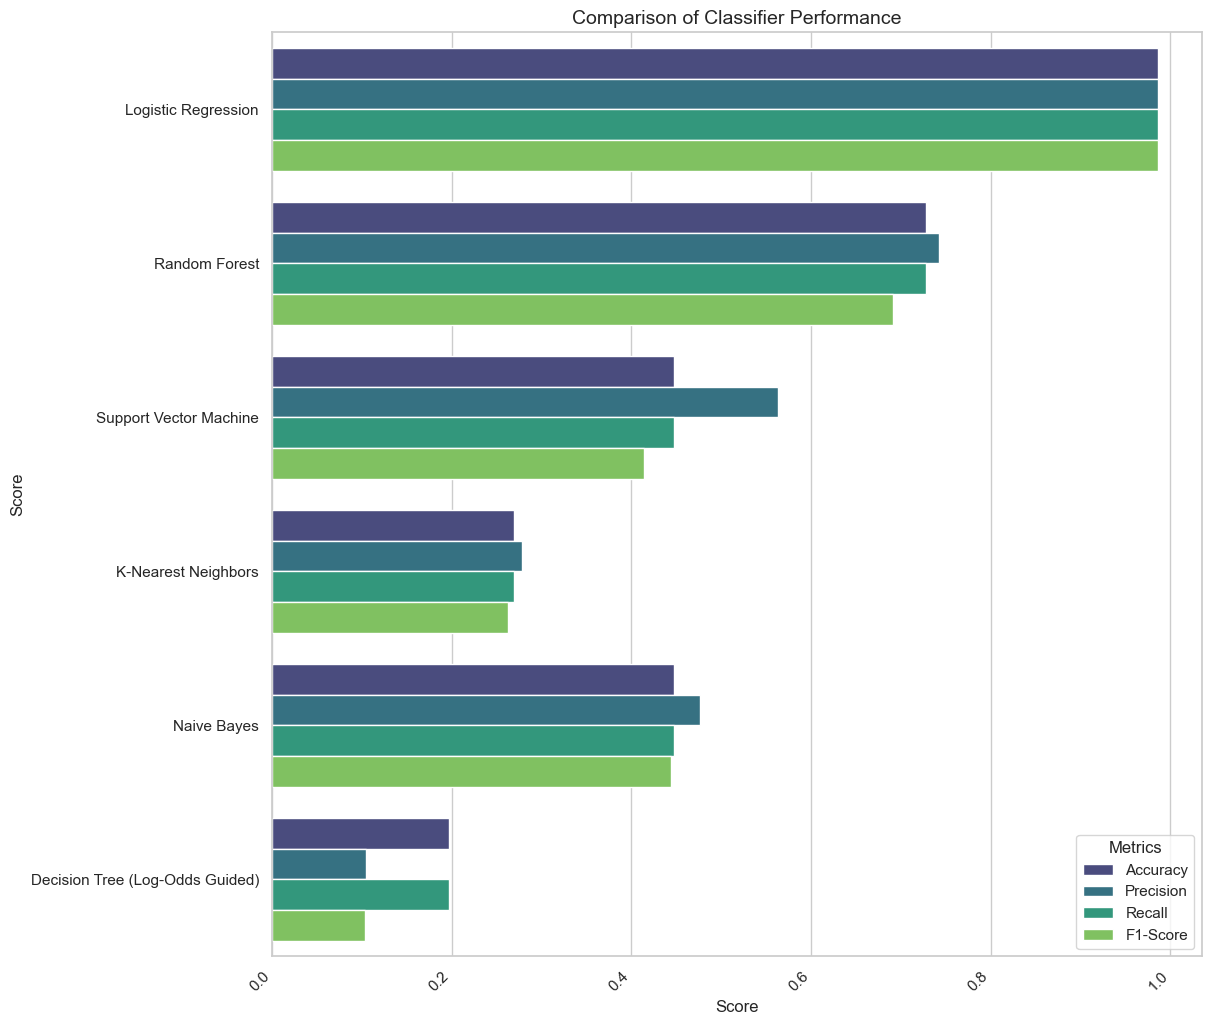

In [5105]:
# Visualize the accuracy results of different models
accuracy_chat(accuracy_data)

# Calculate and display additional performance metrics for the models
model_metrics(X_test, y_test)

<h3> Feature importance by filling null values with mode with threshold > 0.01

In [5107]:
# Feature importance by filling null values with mode.

# Create a copy of the anxiety data for feature importance analysis with mode imputation
feature_importance_mode = anxiety_data.copy()

# Fill missing values in categorical features with the mode (most frequent value)
feature_importance_mode['Medication_Use'] = feature_importance_mode['Medication_Use'].fillna(feature_importance_mode['Medication_Use'].mode()[0])
feature_importance_mode['Substance_Use'] = feature_importance_mode['Substance_Use'].fillna(feature_importance_mode['Substance_Use'].mode()[0])

# Convert stress level to categorical format
feature_importance_mode = stress_level_cate_conversion(feature_importance_mode)

# Calculate correlation between features
feature_importance_mode = correlation_calculation(feature_importance_mode)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_data(feature_importance_mode)

# Train and evaluate multiple machine learning models
accuracy_data = ml_models(models, X_train, X_test, y_train, y_test)

# Store the accuracy results in the accuracy_scored_data dictionary with a descriptive key
accuracy_scored_data["Feature importance > 0.01 on filling null with Mode values"] = accuracy_data

Label Mapping: {9: 'stress 9', 6: 'stress 6', 8: 'stress 8', 4: 'stress 4', 3: 'stress 3', 1: 'stress 1', 7: 'stress 7', 5: 'stress 5', 2: 'stress 2'}

 Training Logistic Regression...
Logistic Regression Accuracy: 0.9750
              precision    recall  f1-score   support

    stress 1       1.00      1.00      1.00        39
    stress 2       1.00      1.00      1.00        37
    stress 3       1.00      1.00      1.00        32
    stress 4       0.98      1.00      0.99        44
    stress 5       0.90      0.88      0.89        41
    stress 6       0.92      0.92      0.92        49
    stress 7       1.00      1.00      1.00        41
    stress 8       1.00      1.00      1.00        36
    stress 9       1.00      1.00      1.00        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.97      0.97      0.97       360

--------------------------------------------------

 Training Random Fore


Accuracy Summary:
Logistic Regression: 0.97
Random Forest: 0.58
Support Vector Machine: 0.45
K-Nearest Neighbors: 0.27
Naive Bayes: 0.46
Decision Tree (Log-Odds Guided): 0.19




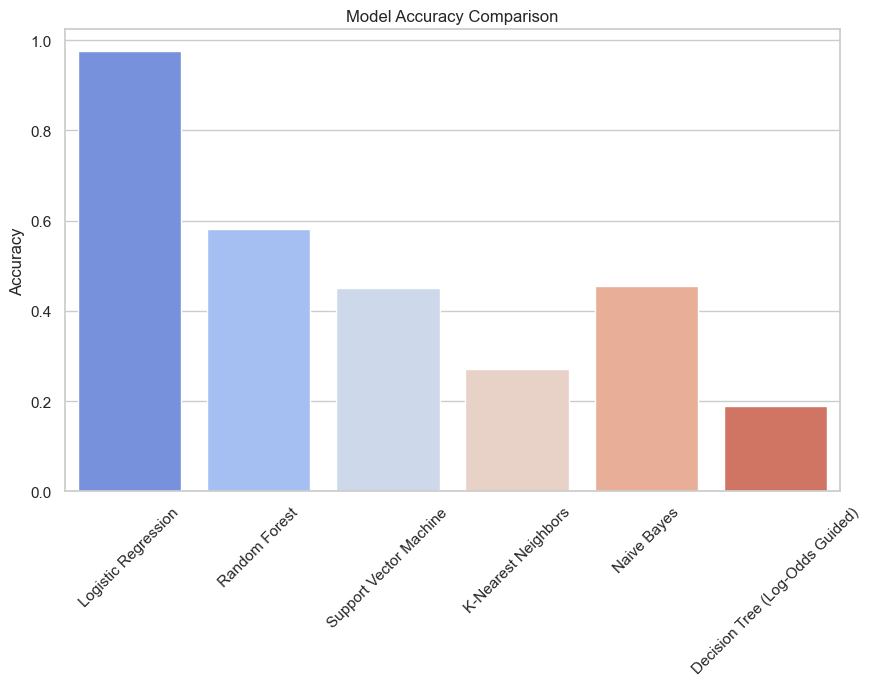

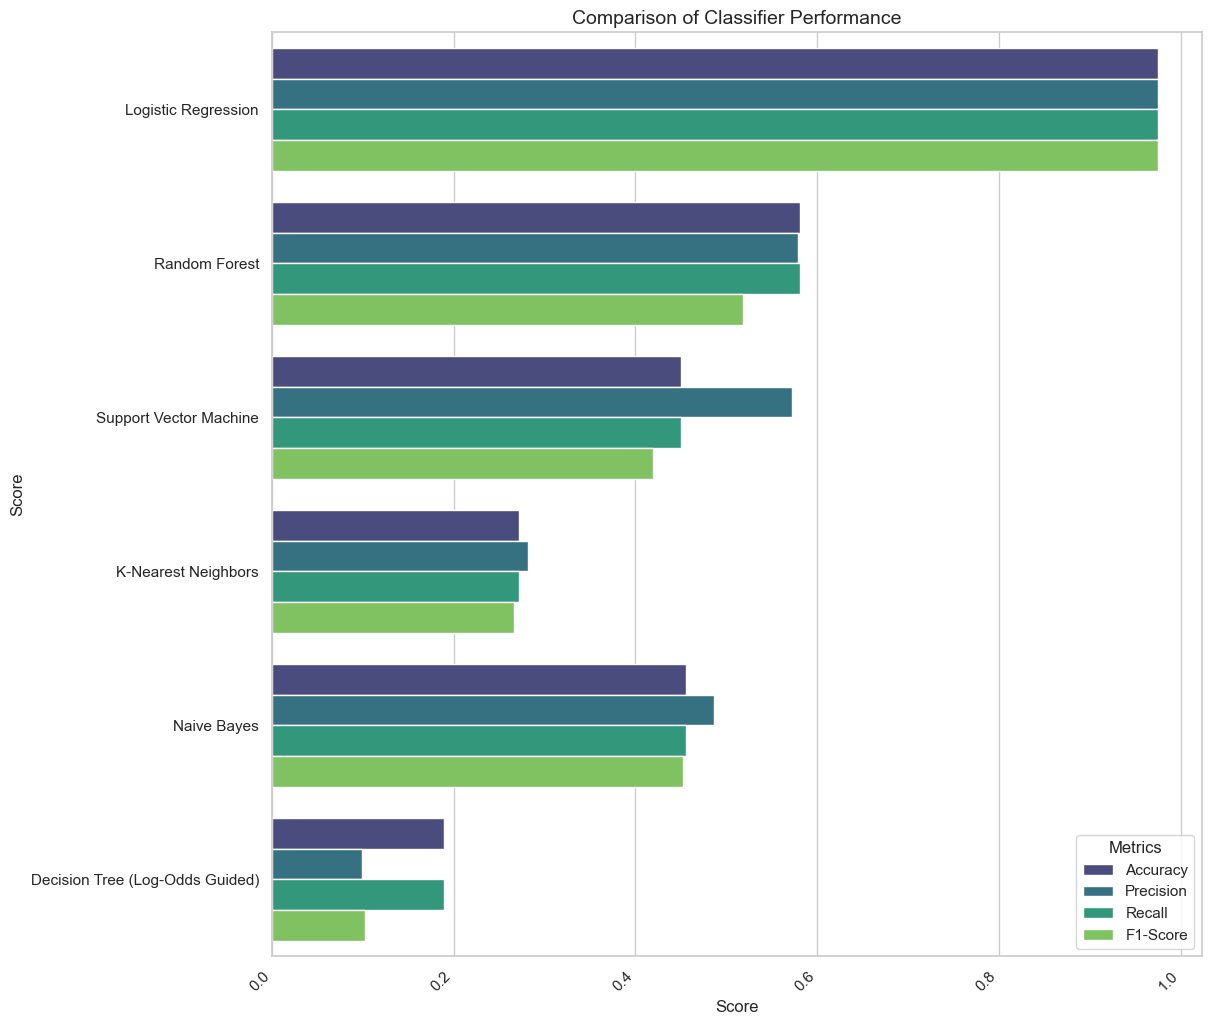

In [5108]:
# Visualize the accuracy results of different models
accuracy_chat(accuracy_data)

# Calculate and display additional performance metrics for the models
model_metrics(X_test, y_test)

<h2> <u><i>Cross Validation </h2>

In [5110]:
# Perform cross-validation on multiple models and evaluate their accuracy.

""" 
    Parameters:
    -----------
    fold_size : int -> Number of folds for K-Fold cross-validation
    models : dict ->  Dictionary of model name to model object pairs
    X_train : array-like -> Training features
    X_test : array-like -> Testing features
    y_train : array-like -> Training target values
    y_test : array-like -> Testing target values
        
    Returns:
    --------
    accuracy_data : dict -> Dictionary containing model names and their test accuracies
"""
def cross_validation(fold_size, models, X_train, X_test, y_train, y_test):
    accuracy_data = {}

    for name, model in models.items():
        print(f"\n🔍 Cross-validating {name}...")

        if name == 'Decision Tree (Log-Odds Guided)':
            model.fit(pd.DataFrame(X_train), pd.Series(y_train))
            y_pred = model.predict(pd.DataFrame(X_test))
        else:
            kf = KFold(n_splits=fold_size, shuffle=True, random_state=42)
            cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)

        print(f"{name} Test Accuracy: {accuracy:.4f}")
        accuracy_data[name] = accuracy

    return accuracy_data


<h3> cross validation with 5 folds and filled null valuws with mode.

In [5112]:
## CV 5 with mode filling

# Create a copy of the original dataset to avoid modifying it
cross_valid_5 = anxiety_data.copy()

# Fill missing values in categorical columns with the mode (most frequent value)
cross_valid_5['Medication_Use'] = cross_valid_5['Medication_Use'].fillna(cross_valid_5['Medication_Use'].mode()[0])
cross_valid_5['Substance_Use'] = cross_valid_5['Substance_Use'].fillna(cross_valid_5['Substance_Use'].mode()[0])

# Convert stress level to categorical format using a previously defined function
cross_valid_5 = stress_level_cate_conversion(cross_valid_5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_data(cross_valid_5)

# Perform 5-fold cross-validation with the specified models
accuracy_data = cross_validation(5, models, X_train, X_test, y_train, y_test)

# Store the accuracy results in a dictionary for later comparison
accuracy_scored_data["Cross Valdiation with 5 on null values filling with mode"] = accuracy_data

Label Mapping: {9: 'stress 9', 6: 'stress 6', 8: 'stress 8', 4: 'stress 4', 3: 'stress 3', 1: 'stress 1', 7: 'stress 7', 5: 'stress 5', 2: 'stress 2'}

🔍 Cross-validating Logistic Regression...
Logistic Regression Test Accuracy: 0.8056

🔍 Cross-validating Random Forest...
Random Forest Test Accuracy: 0.6250

🔍 Cross-validating Support Vector Machine...
Support Vector Machine Test Accuracy: 0.2556

🔍 Cross-validating K-Nearest Neighbors...
K-Nearest Neighbors Test Accuracy: 0.1806

🔍 Cross-validating Naive Bayes...
Naive Bayes Test Accuracy: 0.3972

🔍 Cross-validating Decision Tree (Log-Odds Guided)...
Decision Tree (Log-Odds Guided) Test Accuracy: 0.1889



Accuracy Summary:
Logistic Regression: 0.81
Random Forest: 0.62
Support Vector Machine: 0.26
K-Nearest Neighbors: 0.18
Naive Bayes: 0.40
Decision Tree (Log-Odds Guided): 0.19




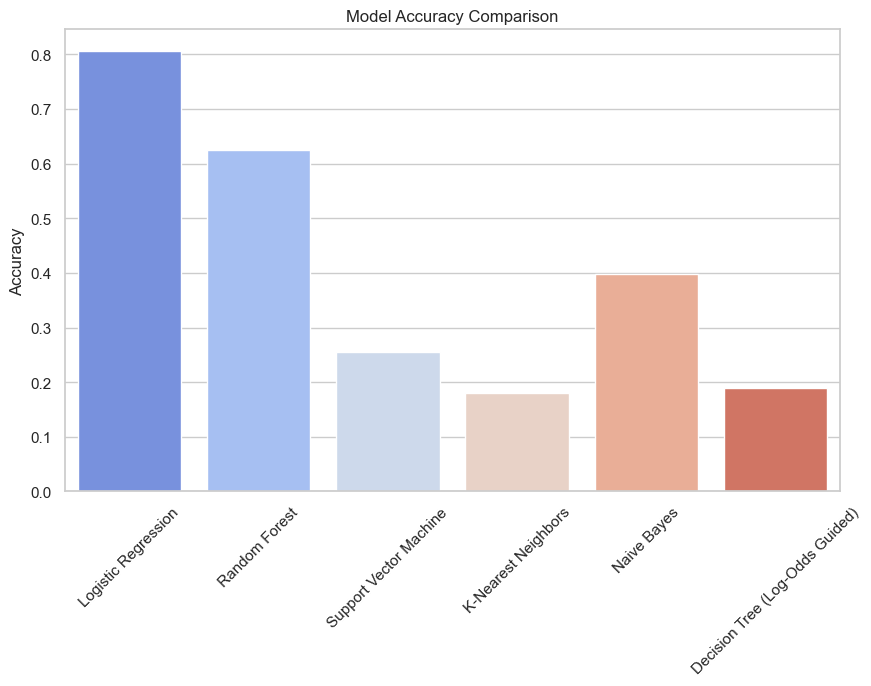

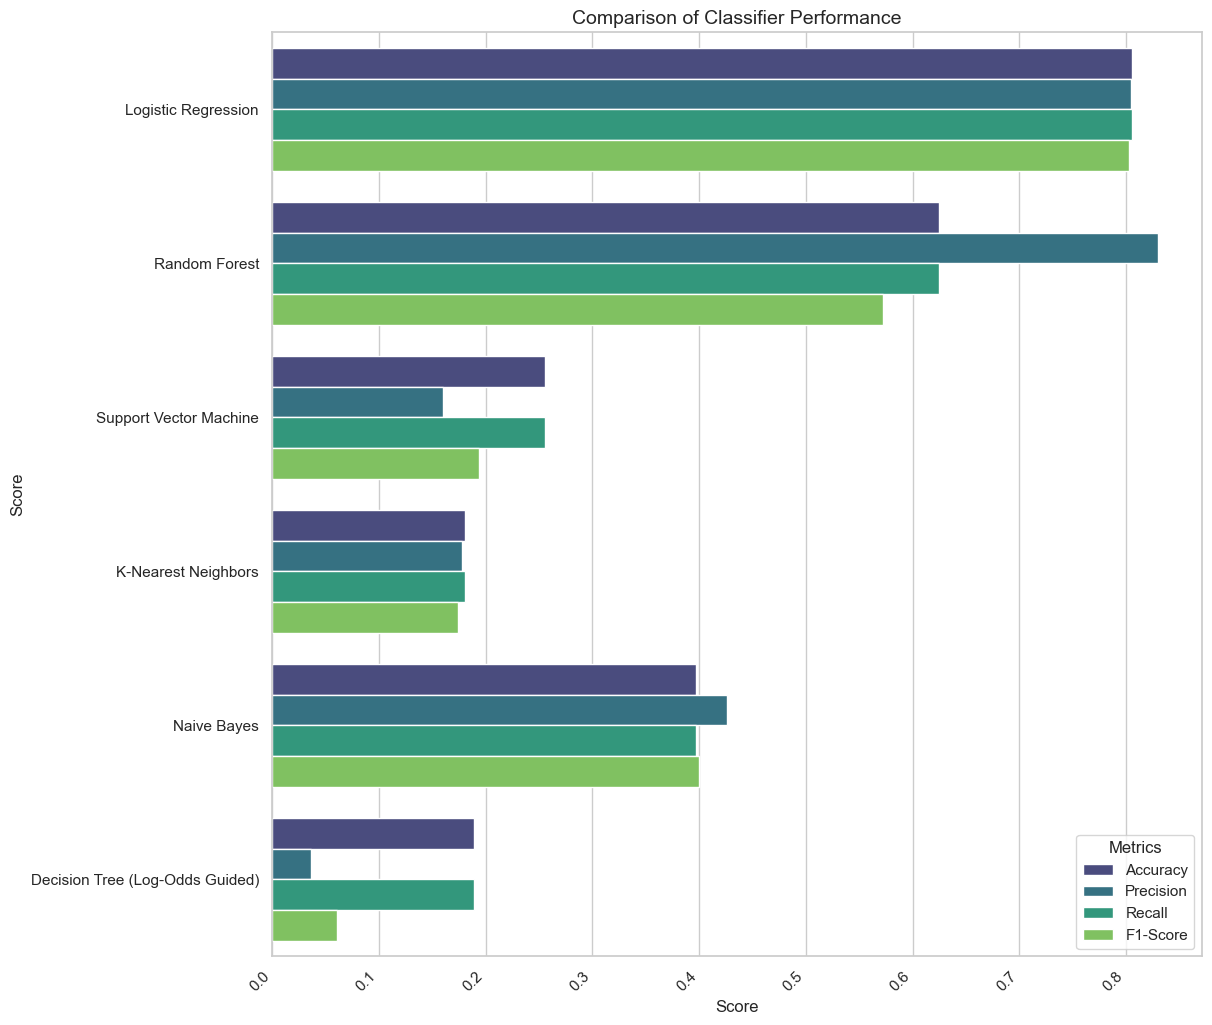

In [5113]:
# Visualize the accuracy results of different models
accuracy_chat(accuracy_data)

# Calculate and display additional performance metrics for the models
model_metrics(X_test, y_test)

<h3> cross validation with 10 folds and filled null valuws with mode.

In [5115]:
## CV 10 with mode filling

# Create a copy of the original dataset to avoid modifying it
cross_valid_10 = anxiety_data.copy()

# Fill missing values in categorical columns with the mode (most frequent value)
cross_valid_10['Medication_Use'] = cross_valid_10['Medication_Use'].fillna(cross_valid_10['Medication_Use'].mode()[0])
cross_valid_10['Substance_Use'] = cross_valid_10['Substance_Use'].fillna(cross_valid_10['Substance_Use'].mode()[0])

# Convert stress level to categorical format using a previously defined function
cross_valid_10 = stress_level_cate_conversion(cross_valid_10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_data(cross_valid_10)

# Perform 10-fold cross-validation on multiple models and collect accuracy metrics
accuracy_data = cross_validation(10, models, X_train, X_test, y_train, y_test)

# Store the results in a dictionary for later comparison with other approaches
accuracy_scored_data["Cross Valdiation with 10 on null values filling with mode"] = accuracy_data

Label Mapping: {9: 'stress 9', 6: 'stress 6', 8: 'stress 8', 4: 'stress 4', 3: 'stress 3', 1: 'stress 1', 7: 'stress 7', 5: 'stress 5', 2: 'stress 2'}

🔍 Cross-validating Logistic Regression...
Logistic Regression Test Accuracy: 0.8056

🔍 Cross-validating Random Forest...
Random Forest Test Accuracy: 0.6250

🔍 Cross-validating Support Vector Machine...
Support Vector Machine Test Accuracy: 0.2556

🔍 Cross-validating K-Nearest Neighbors...
K-Nearest Neighbors Test Accuracy: 0.1806

🔍 Cross-validating Naive Bayes...
Naive Bayes Test Accuracy: 0.3972

🔍 Cross-validating Decision Tree (Log-Odds Guided)...
Decision Tree (Log-Odds Guided) Test Accuracy: 0.1889



Accuracy Summary:
Logistic Regression: 0.81
Random Forest: 0.62
Support Vector Machine: 0.26
K-Nearest Neighbors: 0.18
Naive Bayes: 0.40
Decision Tree (Log-Odds Guided): 0.19




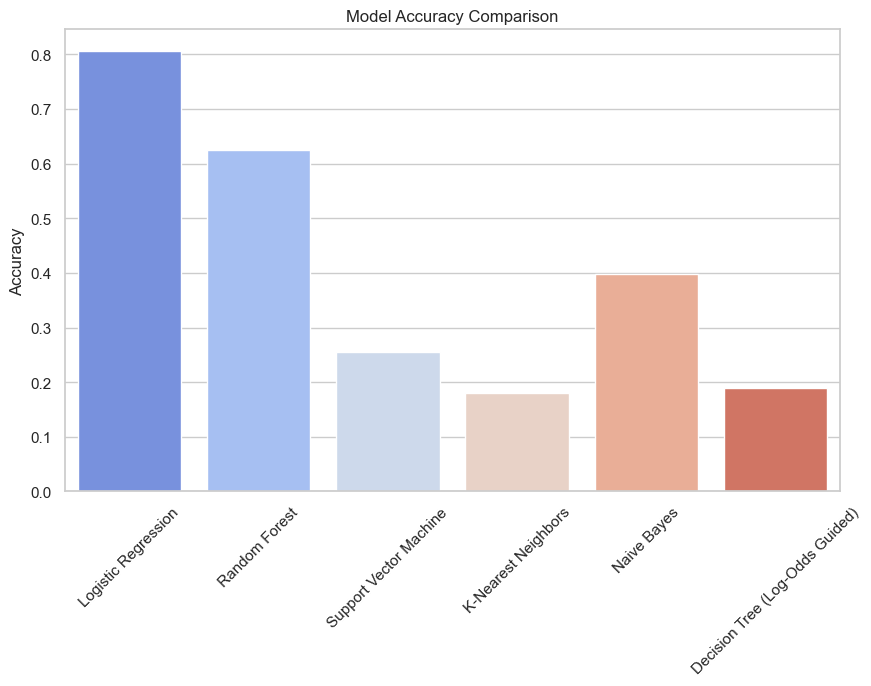

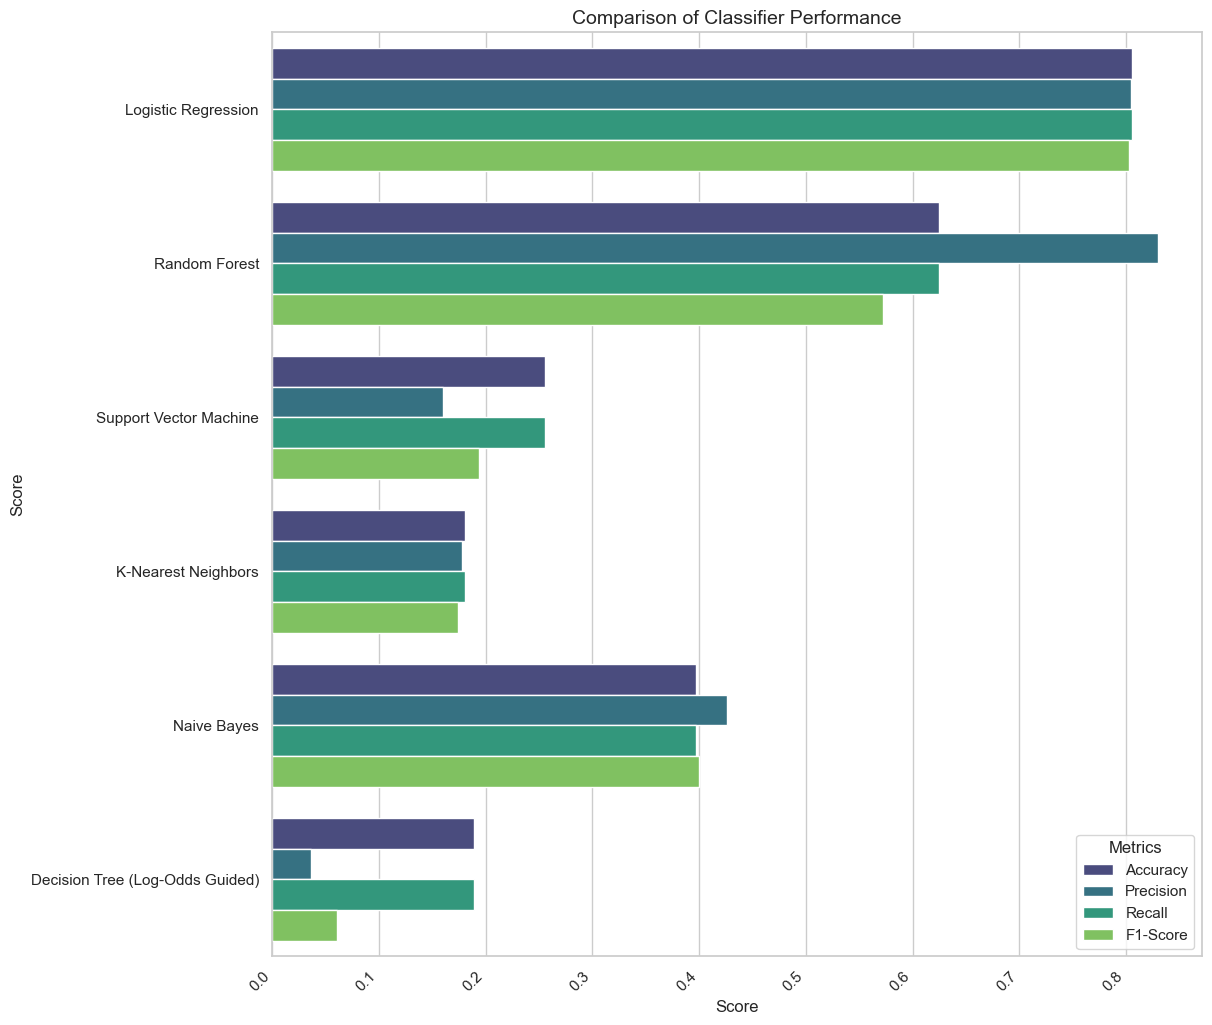

In [5116]:
# Visualize the accuracy results of different models
accuracy_chat(accuracy_data)

# Calculate and display additional performance metrics for the models
model_metrics(X_test, y_test)

<h3> cross validation with 5 folds on knn impute with 5 neighbors

In [5118]:
## Apply KNN imputation with 5 neighbors with cross validation 5

# Create a copy of the anxiety_data to work with
cv_5_knn_impute = anxiety_data.copy()

# Extract categorical columns from the dataset
categorical_data = cv_5_knn_impute.select_dtypes(include=['object'])

# Convert categorical data to numeric format
cv_5_knn_impute = categorical_to_numeric(categorical_data, cv_5_knn_impute)

# Apply KNN imputation with 5 neighbors to handle missing values
cv_5_knn_impute = knn_imputater(5, cv_5_knn_impute)

# Convert stress level to categorical format
cv_5_knn_impute = stress_level_cate_conversion(cv_5_knn_impute)

# Convert stress level to categorical format for cross_valid_10 dataset
cross_valid_10 = stress_level_cate_conversion(cross_valid_10)

# Split the KNN imputed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_data(cv_5_knn_impute)

# Perform 5-fold cross-validation on multiple models using the KNN imputed data
accuracy_data = cross_validation(5, models, X_train, X_test, y_train, y_test)

# Store the accuracy results in the accuracy_scored_data dictionary with key "cv5_KNN_Impute"
accuracy_scored_data["Cross Valdiation with 5 on KNN Impute with 5 neighbors"] = accuracy_data

Label Mapping: {9.0: 'stress 9.0', 6.0: 'stress 6.0', 8.0: 'stress 8.0', 4.0: 'stress 4.0', 3.0: 'stress 3.0', 1.0: 'stress 1.0', 7.0: 'stress 7.0', 5.0: 'stress 5.0', 2.0: 'stress 2.0'}
Label Mapping: {'stress 9': 'stress stress 9', 'stress 6': 'stress stress 6', 'stress 8': 'stress stress 8', 'stress 4': 'stress stress 4', 'stress 3': 'stress stress 3', 'stress 1': 'stress stress 1', 'stress 7': 'stress stress 7', 'stress 5': 'stress stress 5', 'stress 2': 'stress stress 2'}

🔍 Cross-validating Logistic Regression...
Logistic Regression Test Accuracy: 0.8611

🔍 Cross-validating Random Forest...
Random Forest Test Accuracy: 0.5972

🔍 Cross-validating Support Vector Machine...
Support Vector Machine Test Accuracy: 0.2556

🔍 Cross-validating K-Nearest Neighbors...
K-Nearest Neighbors Test Accuracy: 0.1861

🔍 Cross-validating Naive Bayes...
Naive Bayes Test Accuracy: 0.4000

🔍 Cross-validating Decision Tree (Log-Odds Guided)...
Decision Tree (Log-Odds Guided) Test Accuracy: 0.2444



Accuracy Summary:
Logistic Regression: 0.86
Random Forest: 0.60
Support Vector Machine: 0.26
K-Nearest Neighbors: 0.19
Naive Bayes: 0.40
Decision Tree (Log-Odds Guided): 0.24




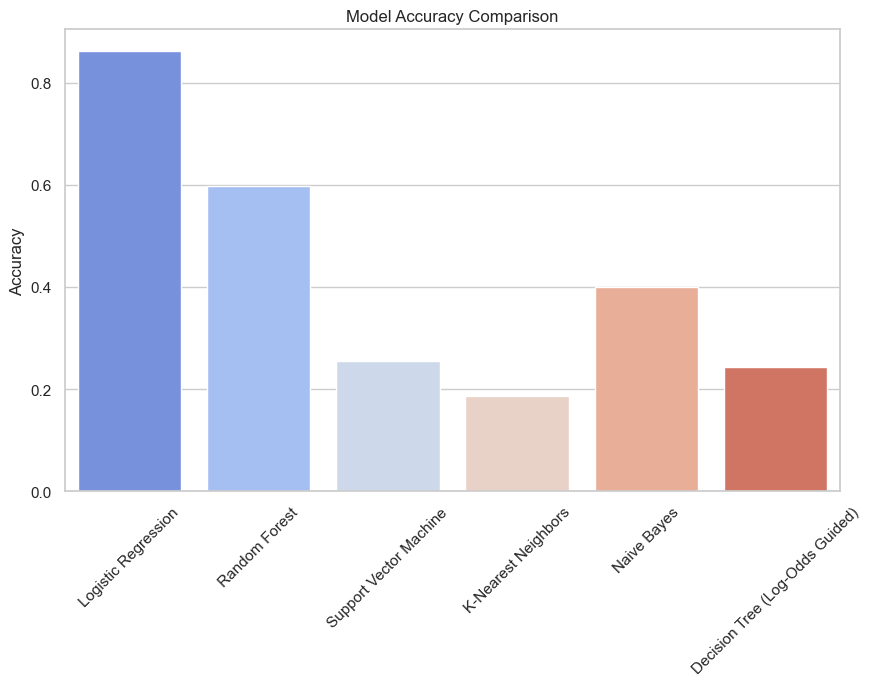

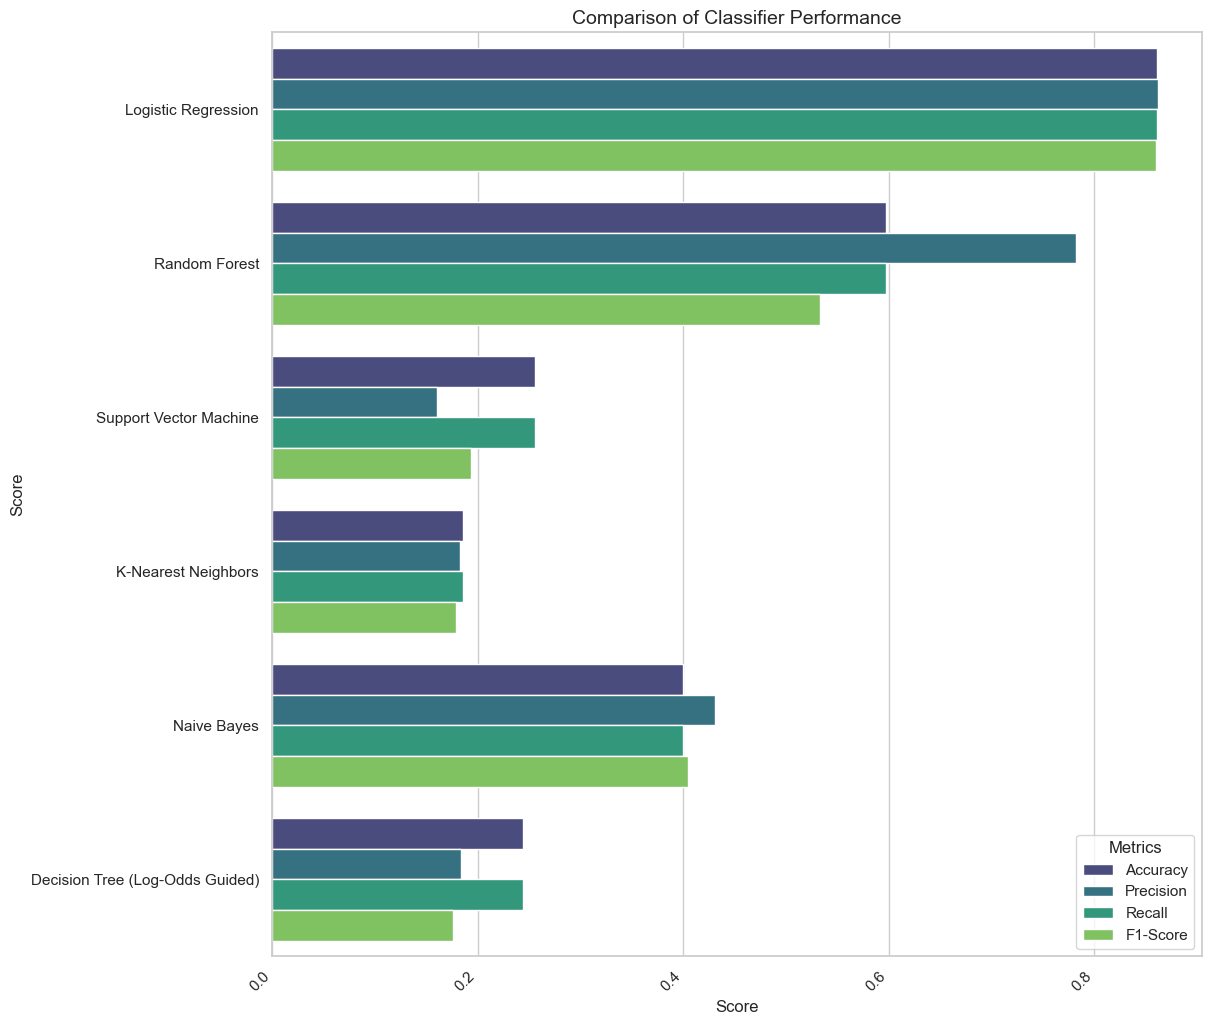

In [5119]:
# Visualize the accuracy results of different models
accuracy_chat(accuracy_data)

# Calculate and display additional performance metrics for the models
model_metrics(X_test, y_test)

<h3> cross validation with 10 folds on knn impute with 5 neighbors

In [5121]:
## Apply KNN imputation with 5 neighbors with cross validation 10

# Create a copy of the anxiety_data to work with
cv_10_knn_impute = anxiety_data.copy()

# Extract categorical columns from the dataset
categorical_data = cv_10_knn_impute.select_dtypes(include=['object'])

# Convert categorical data to numeric format using a custom function
cv_10_knn_impute = categorical_to_numeric(categorical_data, cv_10_knn_impute)

# Apply KNN imputation with 5 neighbors to handle missing values
cv_10_knn_impute = knn_imputater(5, cv_10_knn_impute)

# Convert stress level to categorical format using a custom function
cv_10_knn_impute = stress_level_cate_conversion(cv_10_knn_impute)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_data(cv_10_knn_impute)

# Perform 10-fold cross-validation on multiple models
accuracy_data = cross_validation(10, models, X_train, X_test, y_train, y_test)

# Store the accuracy results in a dictionary with a key indicating the method used
accuracy_scored_data["Cross Valdiation with 10 on KNN Impute with 5 neighbors"] = accuracy_data

Label Mapping: {9.0: 'stress 9.0', 6.0: 'stress 6.0', 8.0: 'stress 8.0', 4.0: 'stress 4.0', 3.0: 'stress 3.0', 1.0: 'stress 1.0', 7.0: 'stress 7.0', 5.0: 'stress 5.0', 2.0: 'stress 2.0'}

🔍 Cross-validating Logistic Regression...
Logistic Regression Test Accuracy: 0.8611

🔍 Cross-validating Random Forest...
Random Forest Test Accuracy: 0.5972

🔍 Cross-validating Support Vector Machine...
Support Vector Machine Test Accuracy: 0.2556

🔍 Cross-validating K-Nearest Neighbors...
K-Nearest Neighbors Test Accuracy: 0.1861

🔍 Cross-validating Naive Bayes...
Naive Bayes Test Accuracy: 0.4000

🔍 Cross-validating Decision Tree (Log-Odds Guided)...
Decision Tree (Log-Odds Guided) Test Accuracy: 0.2444



Accuracy Summary:
Logistic Regression: 0.86
Random Forest: 0.60
Support Vector Machine: 0.26
K-Nearest Neighbors: 0.19
Naive Bayes: 0.40
Decision Tree (Log-Odds Guided): 0.24




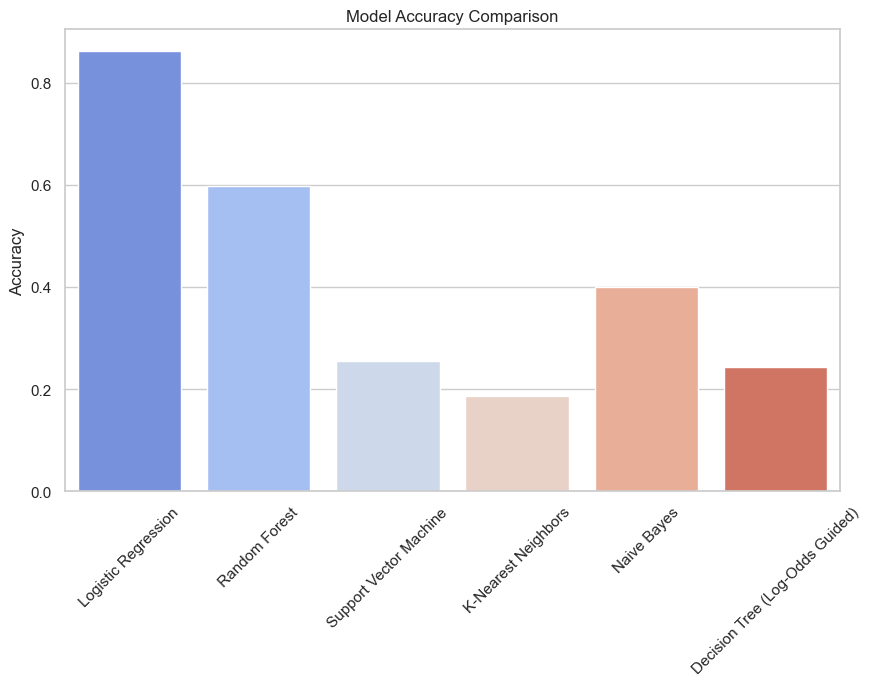

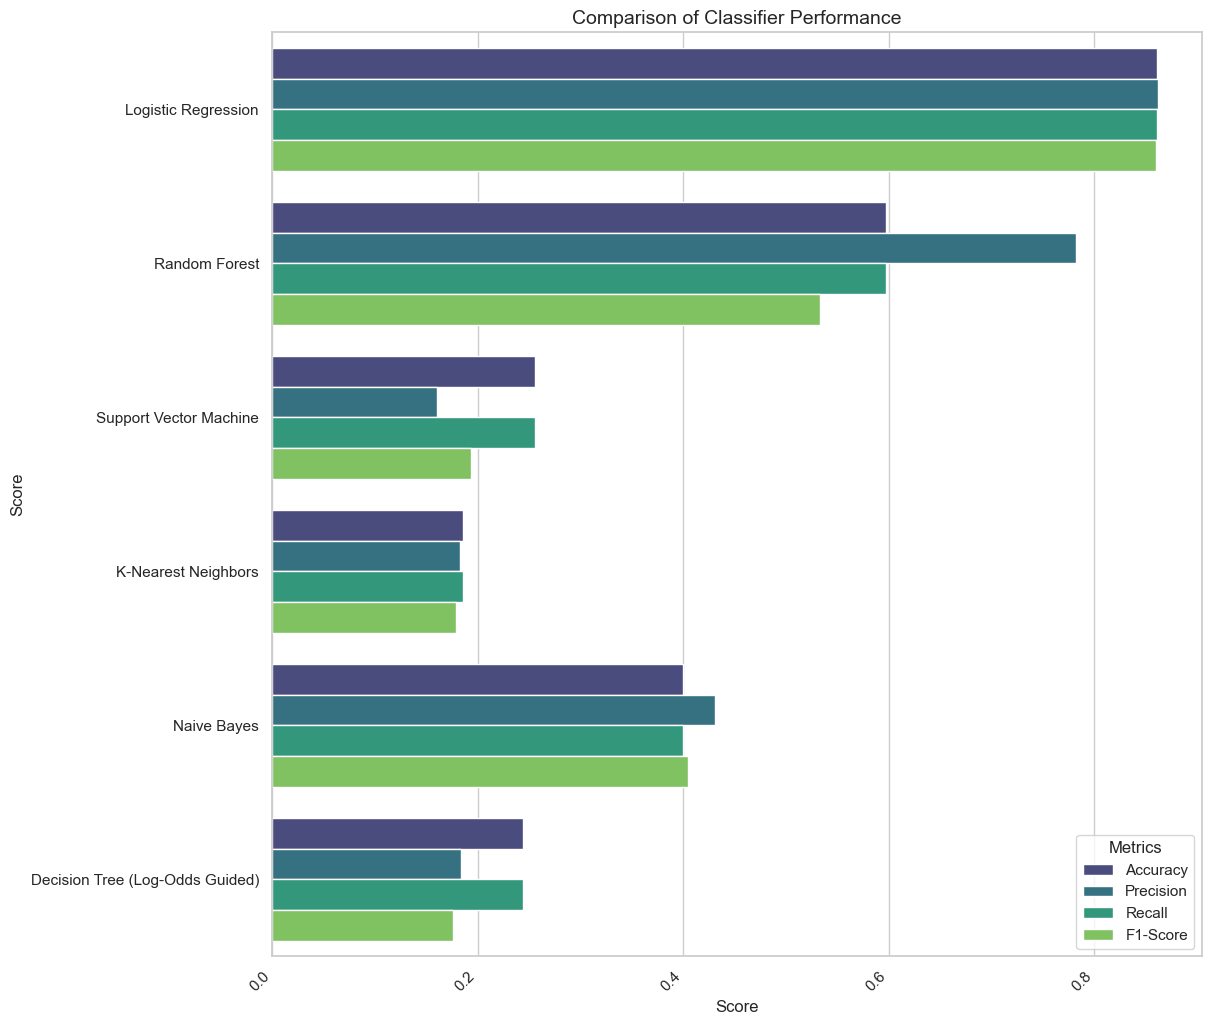

In [5122]:
# Visualize the accuracy results of different models
accuracy_chat(accuracy_data)

# Calculate and display additional performance metrics for the models
model_metrics(X_test, y_test)

<h3> cross validation with 5 folds on knn impute with 5 neighbors and feature importance threshold > 0.01

In [5124]:
# feature importance on KNNcompute with CV5 with importance > 0.01

# Create a copy of the CV5 KNN imputed dataset for feature importance analysis
feature_importance_cv5 = cv_5_knn_impute.copy()

# Calculate correlation coefficients between features
feature_importance_cv5 = correlation_calculation(feature_importance_cv5)

# Convert stress level to categorical format for classification
feature_importance_cv5 = stress_level_cate_conversion(feature_importance_cv5)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_data(feature_importance_cv5)

# Perform 5-fold cross-validation using the defined models
accuracy_data = cross_validation(5, models, X_train, X_test, y_train, y_test)

# Store the cross-validation results in the accuracy_scored_data dictionary with key 'cv5_feature_imp'
accuracy_scored_data["Cross Valdiation with 5 on KNN Impute of 5 neighbors and feature importabce > 0.01"] = accuracy_data

Label Mapping: {'stress 9.0': 'stress stress 9.0', 'stress 6.0': 'stress stress 6.0', 'stress 8.0': 'stress stress 8.0', 'stress 4.0': 'stress stress 4.0', 'stress 3.0': 'stress stress 3.0', 'stress 1.0': 'stress stress 1.0', 'stress 7.0': 'stress stress 7.0', 'stress 5.0': 'stress stress 5.0', 'stress 2.0': 'stress stress 2.0'}

🔍 Cross-validating Logistic Regression...
Logistic Regression Test Accuracy: 0.9861

🔍 Cross-validating Random Forest...
Random Forest Test Accuracy: 0.7278

🔍 Cross-validating Support Vector Machine...
Support Vector Machine Test Accuracy: 0.4472

🔍 Cross-validating K-Nearest Neighbors...
K-Nearest Neighbors Test Accuracy: 0.2694

🔍 Cross-validating Naive Bayes...
Naive Bayes Test Accuracy: 0.4472

🔍 Cross-validating Decision Tree (Log-Odds Guided)...
Decision Tree (Log-Odds Guided) Test Accuracy: 0.1972



Accuracy Summary:
Logistic Regression: 0.99
Random Forest: 0.73
Support Vector Machine: 0.45
K-Nearest Neighbors: 0.27
Naive Bayes: 0.45
Decision Tree (Log-Odds Guided): 0.20




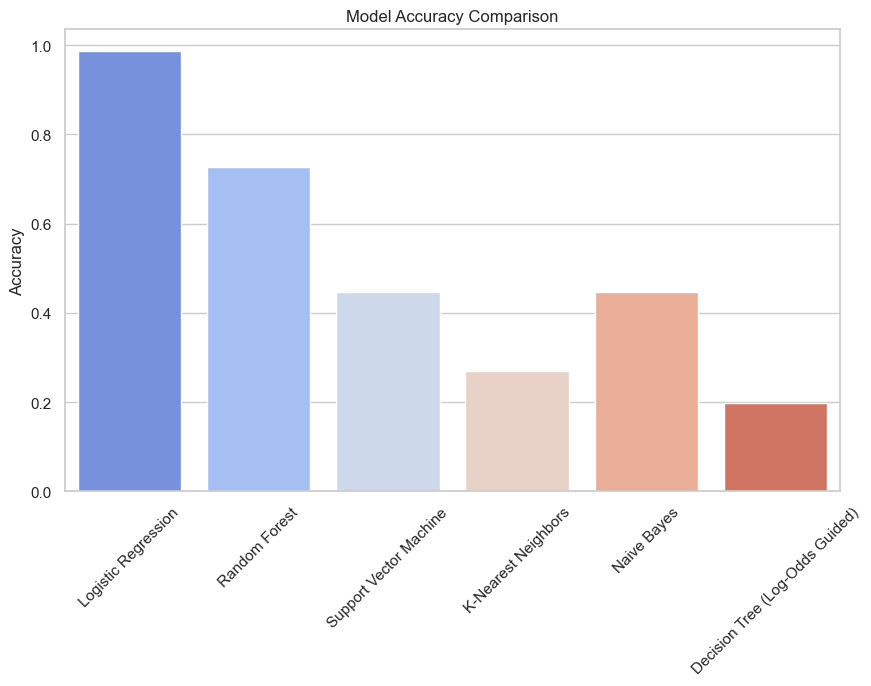

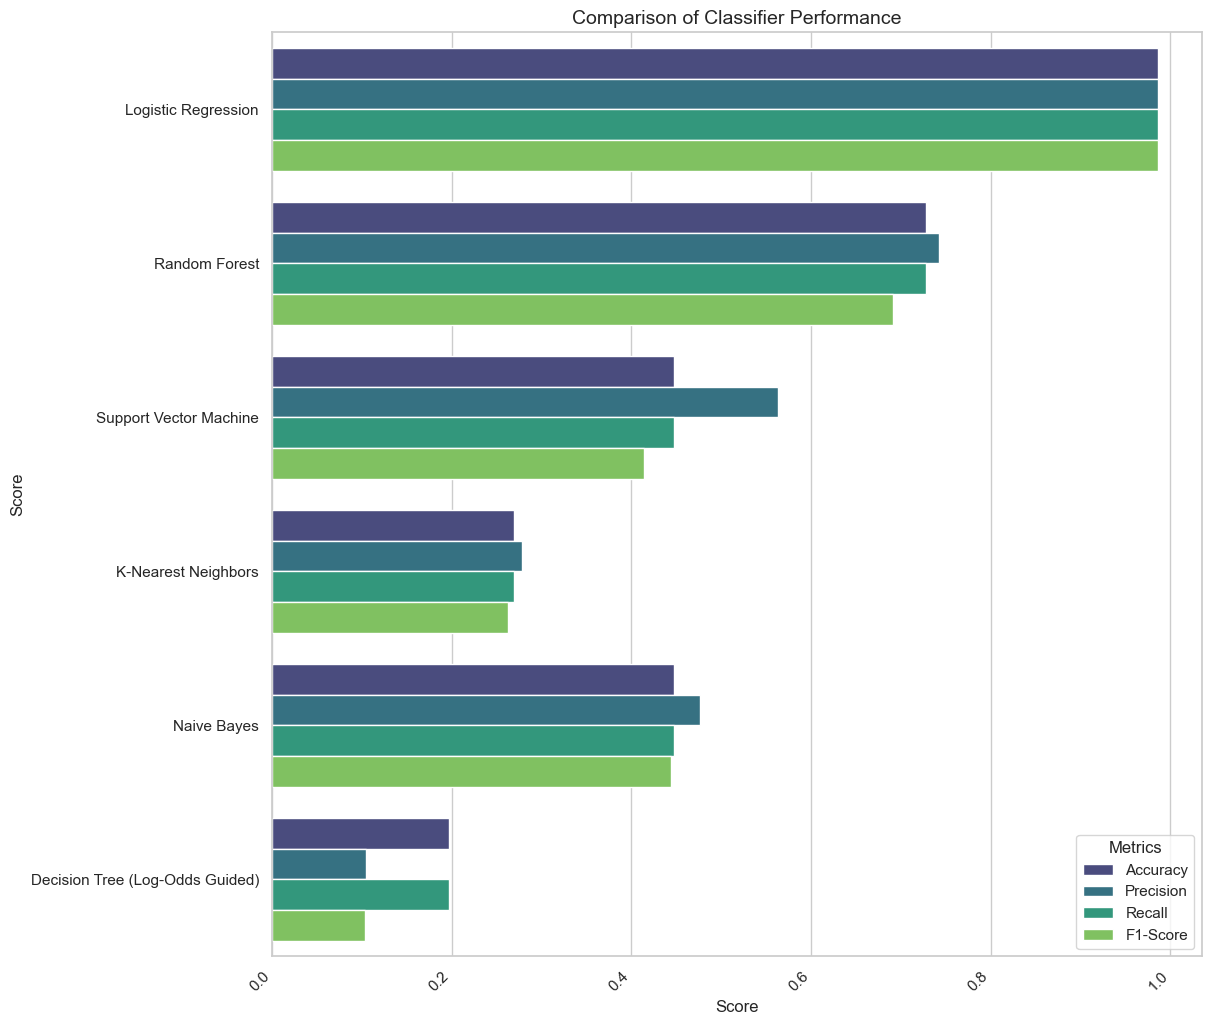

In [5125]:
# Visualize the accuracy results of different models
accuracy_chat(accuracy_data)

# Calculate and display additional performance metrics for the models
model_metrics(X_test, y_test)

<h3> cross validation with 10 folds on knn impute with 5 neighbors and feature importance threshold > 0.01

In [5127]:
# feature importance on KNNcompute with CV10 with importance > 0.01

# Create a copy of the KNN imputed dataset with 10-fold cross-validation
feature_importance_cv10 = cv_10_knn_impute.copy()

# Calculate correlation coefficients between features
feature_importance_cv10 = correlation_calculation(feature_importance_cv10)

# Convert stress level to categorical format
feature_importance_cv10 = stress_level_cate_conversion(feature_importance_cv10)

# Note: Categorical encoding is commented out
#feature_importance_cv10 = encode_categoricals(feature_importance_cv10)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_data(feature_importance_cv10)

# Perform 10-fold cross-validation on multiple models and collect accuracy metrics
accuracy_data = cross_validation(10, models, X_train, X_test, y_train, y_test)

# Store the accuracy results in a dictionary under the key "cv10_feature_imp"
accuracy_scored_data["Cross Valdiation with 10 on KNN Impute of 5 neighbors and feature importabce > 0.01"] = accuracy_data

Label Mapping: {'stress 9.0': 'stress stress 9.0', 'stress 6.0': 'stress stress 6.0', 'stress 8.0': 'stress stress 8.0', 'stress 4.0': 'stress stress 4.0', 'stress 3.0': 'stress stress 3.0', 'stress 1.0': 'stress stress 1.0', 'stress 7.0': 'stress stress 7.0', 'stress 5.0': 'stress stress 5.0', 'stress 2.0': 'stress stress 2.0'}

🔍 Cross-validating Logistic Regression...
Logistic Regression Test Accuracy: 0.9861

🔍 Cross-validating Random Forest...
Random Forest Test Accuracy: 0.7278

🔍 Cross-validating Support Vector Machine...
Support Vector Machine Test Accuracy: 0.4472

🔍 Cross-validating K-Nearest Neighbors...
K-Nearest Neighbors Test Accuracy: 0.2694

🔍 Cross-validating Naive Bayes...
Naive Bayes Test Accuracy: 0.4472

🔍 Cross-validating Decision Tree (Log-Odds Guided)...
Decision Tree (Log-Odds Guided) Test Accuracy: 0.1972



Accuracy Summary:
Logistic Regression: 0.99
Random Forest: 0.73
Support Vector Machine: 0.45
K-Nearest Neighbors: 0.27
Naive Bayes: 0.45
Decision Tree (Log-Odds Guided): 0.20




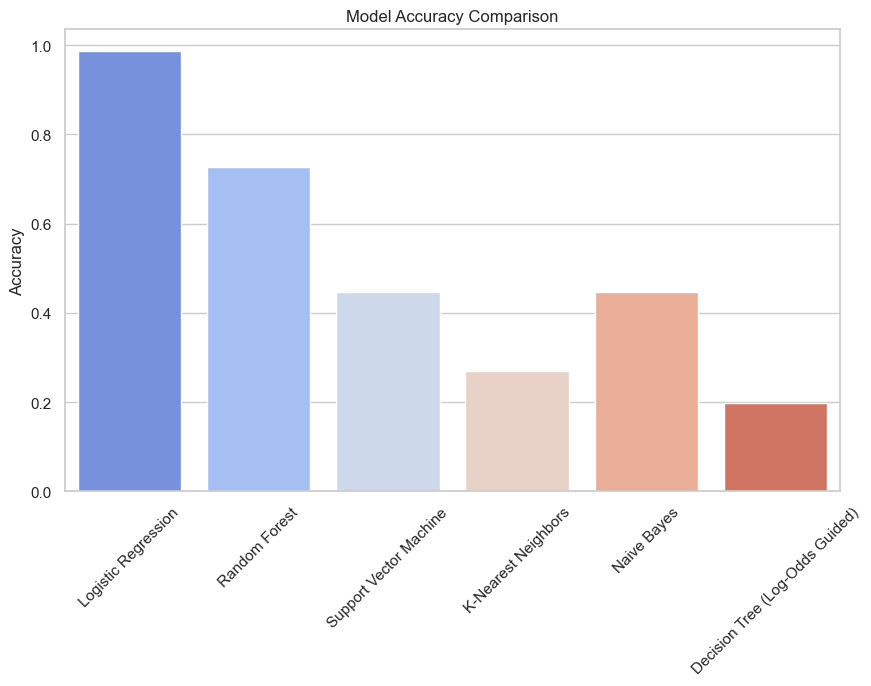

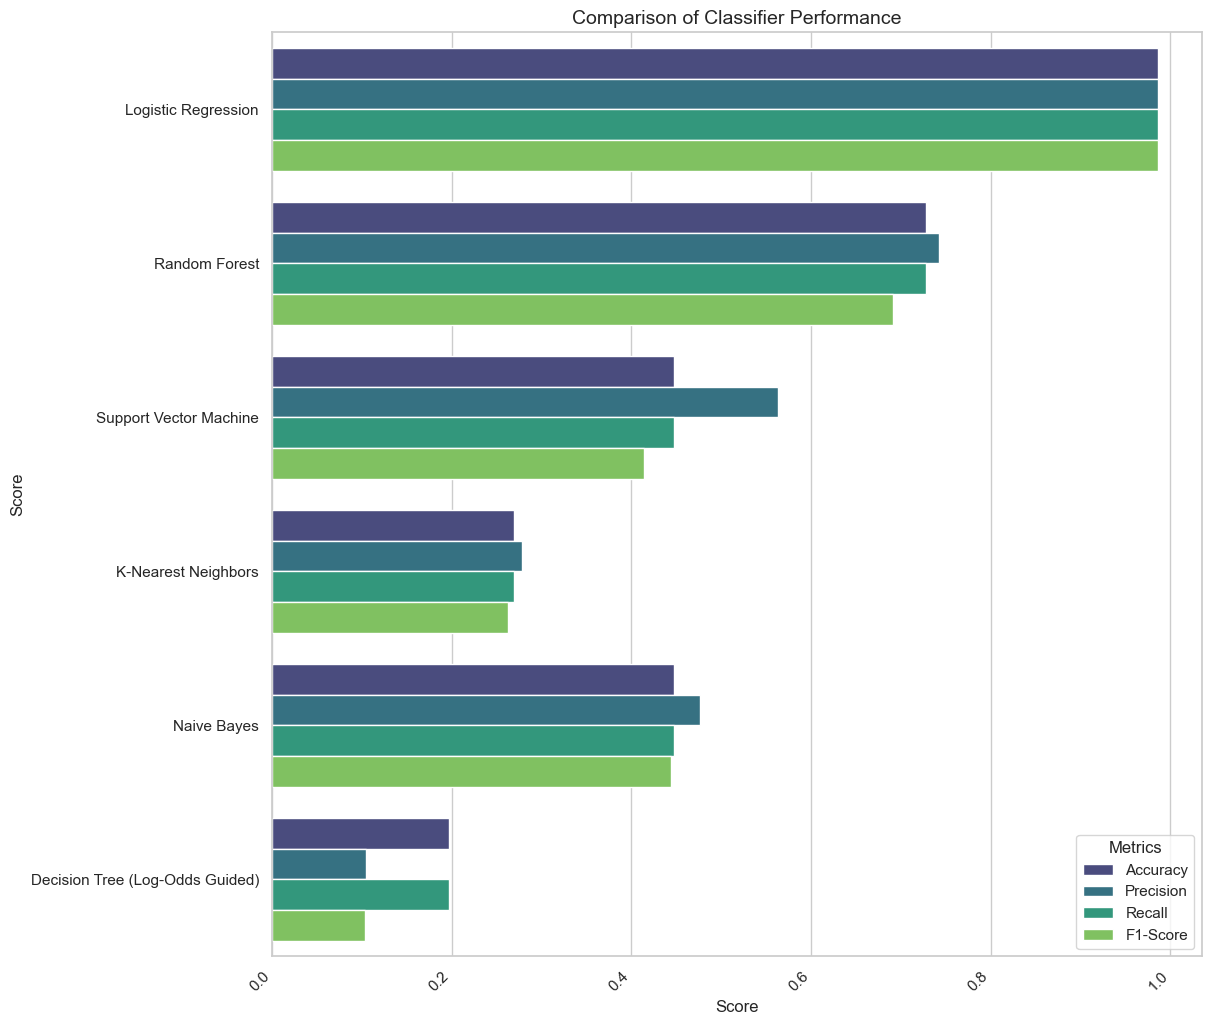

In [5128]:
# Visualize the accuracy results of different models
accuracy_chat(accuracy_data)

# Calculate and display additional performance metrics for the models
model_metrics(X_test, y_test)

<h1><i> <b><u>Metrics information for all the classifiers

In [5130]:
# Printing metrics for all the classifiers

for key, val in accuracy_scored_data.items():
    print(key)
    print("==========================================================================================================================")
    print(val)
    print("==========================================================================================================================")
    print("\n")

Labels are Numeric
{'Logistic Regression': 0.12222222222222222, 'Random Forest': 0.125, 'Support Vector Machine': 0.125, 'K-Nearest Neighbors': 0.1111111111111111, 'Naive Bayes': 0.13333333333333333, 'Decision Tree (Log-Odds Guided)': 0.09444444444444444}


Labels are Categorical
{'Logistic Regression': 0.8055555555555556, 'Random Forest': 0.625, 'Support Vector Machine': 0.25555555555555554, 'K-Nearest Neighbors': 0.18055555555555555, 'Naive Bayes': 0.3972222222222222, 'Decision Tree (Log-Odds Guided)': 0.18888888888888888}


KNN compute with 5 Neighbors on categorical label
{'Logistic Regression': 0.8611111111111112, 'Random Forest': 0.5972222222222222, 'Support Vector Machine': 0.25555555555555554, 'K-Nearest Neighbors': 0.18611111111111112, 'Naive Bayes': 0.4, 'Decision Tree (Log-Odds Guided)': 0.24444444444444444}


Feature importance > 0.01 on KNN compute with 5 neighbors
{'Logistic Regression': 0.9861111111111112, 'Random Forest': 0.7277777777777777, 'Support Vector Machine': 0.

<h1><u><i>conclusion</i></u></h1>

<h3>Logistic Regression achieved the highest accuracy of 98.6% in predicting stress levels, outperforming other models.<h3>

<p>Logistic Regression models with feature importance analysis and with/without cross-validation produced identical results, demonstrating the robustness of the approach.</p>

<p>Cross-validation, regardless of fold size, consistently yielded the same accuracy levels. Thus, it did not significantly enhance model performance for this dataset.</p>

<p>Transforming the target variable (Stress_Level) from numeric to categorical significantly improved prediction metrics and overall model performance.</p>

<p>Therefore, Logistic Regression without cross-validation, when combined with feature importance selection on categorical target data, provides the best prediction results for identifying stress levels in individuals.</p>

<p>In summary, Logistic Regression is the most reliable model for this task, and a simple model without heavy cross-validation still achieves highly accurate and robust results.</p>
